In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [542]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

In [543]:
df = pd.read_excel("Public Sector Debt.xlsx")
df.sample(5)

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,Comoros,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,150.26557,142.94355,136.771213,128.934441,119.977094,113.768173,108.244018,103.974137,101.09832,95.843625,87.86998,77.779873,75.432581,70.96075,69.437031,64.550171,60.772927,53.019171,48.222137,44.497791,42.44646,39.8646,38.478977,35.615571,33.217032,31.729574,30.458622,27.668203,25.07316,10.277146,11.823493,14.274072,16.161572,18.934437,17.021874,21.228836,24.315491,26.275781,28.072627,33.232028
111,Nepal,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,0.559136,1.302633,1.733995,2.486177,2.829127,3.717934,6.505883,9.008796,8.784879,9.3741,11.710142,12.677734,17.980465,22.637288,25.216829,28.899192,31.348574,36.324763,35.900351,40.769217,45.988537,45.892986,50.196115,50.984605,52.894174,52.123602,50.283388,47.185146,51.370151,55.786795,50.787669,50.766336,51.81524,52.974454,51.323524,45.132658,42.868727,37.885104,36.757291,39.462449,35.390928,32.424614,34.514816,31.898804,27.551021,25.730446,24.957344,24.989108,31.087851,34.030067,43.307442,43.284868,42.730032,47.124195
160,Turkmenistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,84.865335,107.915404,88.152011,72.895174,45.068043,31.963482,22.366796,15.091677,9.011975,5.586657,4.047044,4.7065,4.081368,6.214668,10.018897,13.761804,16.013711,12.304383,14.54457,18.520179,19.980362,18.662507,15.271739,13.323125,10.652752,5.772002,4.665729
141,Slovenia,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,16.206621,15.823951,16.521245,19.948547,20.305214,20.965367,21.638894,22.429572,24.248521,25.156956,24.288726,24.162529,23.993289,23.36004,21.0856,18.935962,30.570756,32.682219,40.899543,46.440493,60.337067,69.126247,70.211901,67.079618,66.819008,63.607859,58.787103,72.949578,68.622757,66.351203,63.128242
148,Suriname,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,25.307586,28.021151,26.118275,25.053149,4.6352,4.658574,2.878533,no data,no data,no data,no data,no data,no data,33.83547,46.971531,66.824253,no data,no data,no data,72.881146,75.708628,64.386949,51.052284,30.497499,16.258364,11.76999,16.780775,21.643936,32.302597,48.438081,37.198435,37.408408,31.493101,29.353853,27.107464,22.536262,16.418495,14.773528,14.648173,17.316953,18.737565,20.095565,27.901834,25.207871,41.175383,75.394681,73.028817,68.627473,84.026969,146.436416,115.824067,116.939033,90.304982


Percentage of missing data for 1980: 25.00%
Percentage of missing data for 1990: 16.67%
Percentage of missing data for 1995: 5.56%
Percentage of missing data for 2000: 2.78%
Percentage of missing data for 2010: 0.00%


C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\3426244933.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['no data', '', 'None'], np.nan, inplace=True)
C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\3426244933.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['no data', '', 'None'], np.nan, inplace=True)


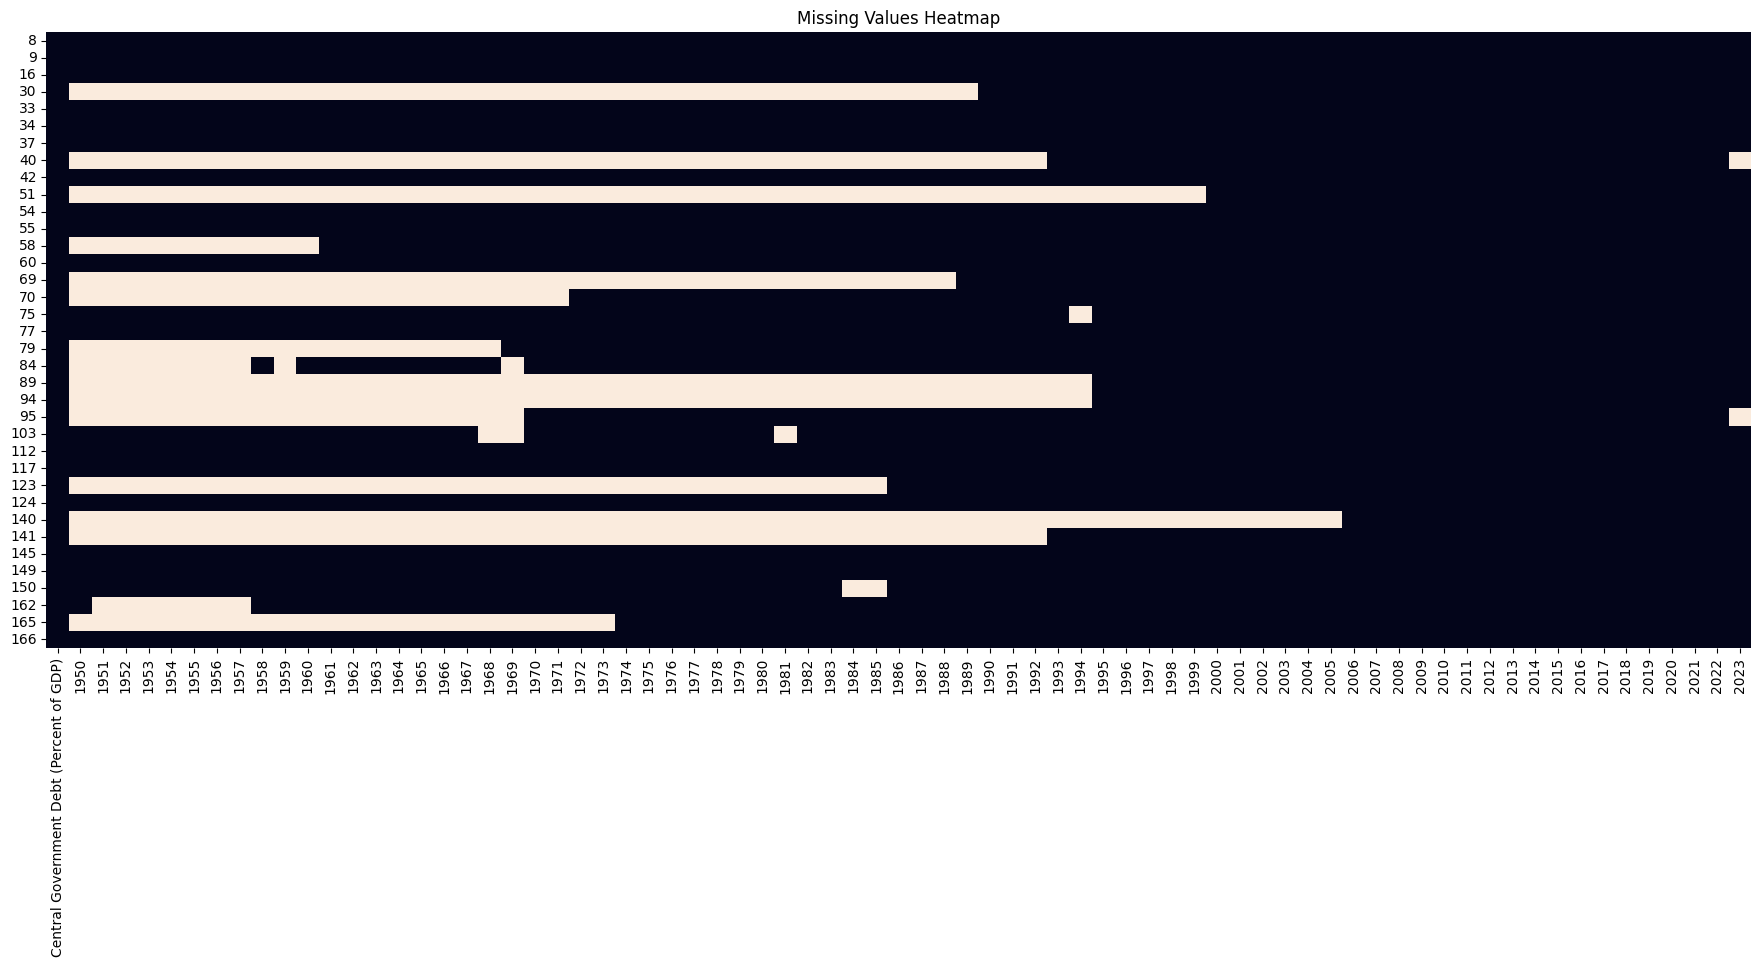

In [544]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_missing_data(df, years_of_interest, selected_countries, country_column_name):
    """
    This function calculates the percentage of missing data for specified years in the dataset.
    It checks if the selected countries exist in the dataset based on the provided country column name,
    and can filter accordingly.
    
    Parameters:
    df (DataFrame): The input data frame.
    years_of_interest (list): The list of years to check for missing data.
    selected_countries (list): A list of countries from the dataset to check against.
    country_column_name (str): The name of the column that contains the countries.
    
    Returns:
    missing_percentages (dict): A dictionary containing the percentage of missing data for each year.
    """
    
    # Check if all selected countries exist in the dataset and filter by them
    missing_countries = [country for country in selected_countries if country not in df[country_column_name].unique()]
    
    if missing_countries:
        print(f"Warning: The following selected countries are not in the dataset: {missing_countries}")
    
    # Filter the dataframe by the selected countries
    df = df[df[country_column_name].isin(selected_countries)]
    
    # Replace 'no data' with NaN
    df.replace(['no data', '', 'None'], np.nan, inplace=True)
    
    # Calculate the percentage of missing data for each year
    missing_percentages = {}
    for year in years_of_interest:
        if year in df.columns:
            missing_count = df[year].isna().sum()  # Count the NaN values for the given year
            total_count = len(df)  # Total number of rows in the DataFrame
            missing_percentage = (missing_count / total_count) * 100  # Percentage of missing data
            missing_percentages[year] = missing_percentage
    
    # Print the results
    for year, percentage in missing_percentages.items():
        print(f"Percentage of missing data for {year}: {percentage:.2f}%")
    
    # Plot heatmap of missing values
    plt.figure(figsize=(22, 8))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()
    
    return missing_percentages


# Example usage
years_of_interest = [1980, 1990, 1995, 2000, 2010]
selected_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Italy", "Japan", "Korea, Republic of", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland",
    "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Türkiye, Republic of",
    "United Kingdom", "United States"
]

country_column_name = 'Central Government Debt (Percent of GDP)'  # Specify your country column name here
missing_percentages = calculate_missing_data(df, years_of_interest, selected_countries, country_column_name)

In [545]:
sk = df[df['Central Government Debt (Percent of GDP)'] == 'Korea, Republic of']
sk

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
84,"Korea, Republic of",no data,no data,no data,no data,no data,no data,no data,no data,16.170629,no data,13.113285,12.807659,12.492721,8.825091,6.288849,5.884829,4.255514,3.578801,2.640069,no data,10.693496,14.679477,18.566005,18.154232,18.939671,21.820032,20.714488,20.403383,18.701794,16.008823,18.878659,19.165634,20.942358,19.733154,17.336181,16.630322,14.932015,15.70495,13.026278,12.72232,12.238558,11.415776,11.160201,10.421399,9.243627,8.152614,7.502808,9.308807,13.297701,15.168509,15.490529,15.996689,16.132705,18.964249,21.586473,24.941308,27.167819,26.531207,25.809714,28.713704,28.262274,29.000591,29.518552,30.916449,32.183164,33.564123,34.002007,34.177731,34.337928,36.32116,42.211001,45.14473,47.803334,48.852372


In [546]:
df['Central Government Debt (Percent of GDP)'] = df['Central Government Debt (Percent of GDP)'].replace("Korea, Republic of", "Korea, Rep.")


In [547]:
df['Central Government Debt (Percent of GDP)'] = df['Central Government Debt (Percent of GDP)'].replace("Türkiye, Republic of", "Turkiye")

I checked online and czechia is the same as czech republic.

In [548]:
df['Central Government Debt (Percent of GDP)'] = df['Central Government Debt (Percent of GDP)'].replace("Czech Republic", "Czechia")

In [549]:
df.dropna(how="all", inplace=True)


In [550]:
df["Indicator Name"] = "Central Government Debt (Percent of GDP)"

In [551]:
df["Country Name"] = df["Central Government Debt (Percent of GDP)"]

In [648]:
df.replace(['no data', '', 'None'], np.nan, inplace=True)
    

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\4172734568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['no data', '', 'None'], np.nan, inplace=True)


In [649]:
df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Indicator Name,Country Name
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.977479,270.602364,244.966691,206.356007,22.984644,20.136631,19.057076,16.247261,7.696949,7.501084,6.759468,6.904479,8.700291,9.154083,8.437266,7.997660,7.384413,6.349830,7.797235,NaN,NaN,NaN,Central Government Debt (Percent of GDP),Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.629863,29.359587,34.690090,51.409342,57.010236,57.789526,63.376463,60.609729,64.097401,60.239905,57.472884,58.199553,56.690318,53.550124,55.140209,59.670183,57.710251,59.399813,62.119953,65.530000,70.030000,72.670075,72.380043,70.119933,67.610016,65.729866,74.299952,74.489915,64.459994,59.131403,Central Government Debt (Percent of GDP),Albania
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.911524,29.324952,25.347032,30.767822,29.966253,33.746532,39.905974,50.164181,64.814200,60.071980,51.228261,41.210765,41.005731,43.081174,43.594192,43.352417,55.777641,63.928478,76.909576,72.271582,63.617816,66.021301,64.614770,89.864538,90.290278,95.865609,90.675881,79.561035,79.890177,69.676279,53.405657,50.002857,47.312491,38.224215,32.689637,25.365524,22.472510,12.794482,7.637351,8.922469,9.513301,8.478107,8.583172,6.477529,6.852797,7.731179,18.094430,24.015146,34.492665,40.881598,45.967375,55.134496,48.084933,48.618767,Central Government Debt (Percent of GDP),Algeria
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.115494,91.992365,73.462418,96.340929,104.827320,118.242536,100.221455,65.107033,50.759880,41.626647,29.886387,16.725864,18.804413,28.122021,48.448006,32.593691,26.317854,23.805354,29.473055,35.274186,50.385820,66.670005,60.492126,82.541362,101.372846,119.145419,74.292159,56.108160,73.682142,Central Government Debt (Percent of GDP),Angola
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.132400,94.634479,90.784115,85.291957,84.545934,92.140211,85.547557,80.650294,94.566065,95.924678,96.472699,107.597844,114.540621,112.996378,107.665580,82.835983,79.128760,68.655356,66.843267,89.155304,79.403703,81.130881,76.931616,85.384697,91.878744,92.108117,83.055941,88.389158,84.332698,81.640002,100.524604,92.995378,81.977209,76.833172,Central Government Debt (Percent of GDP),Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.023780,22.159103,20.869959,20.655032,21.091163,23.995367,19.252500,23.717505,22.978294,23.963563,22.718087,26.284934,29.801102,30.231390,33.952136,37.070953,31.027315,31.784584,33.144905,34.468710,47.080074,50.176497,47.120628,49.693034,Central Government Debt (Percent of GDP),West Bank and Gaza
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [650]:
df.drop(columns=["Central Government Debt (Percent of GDP)"], inplace=True)


KeyError: "['Central Government Debt (Percent of GDP)'] not found in axis"

In [651]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = year_columns = list(range(1940, 2025))  # Keep as integers
  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df = df_filtered.melt(
    id_vars=["Country Name", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df = melted_df.pivot_table(
    index=["Country Name",  "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df.columns.name = None  # Remove column name from pivot_table
pivoted_df.head(40)  # Show a sample of the transformed dataset



,Country Name,Year,Central Government Debt (Percent of GDP)
0,Afghanistan,2002,345.977479
1,Afghanistan,2003,270.602364
2,Afghanistan,2004,244.966691
3,Afghanistan,2005,206.356007
4,Afghanistan,2006,22.984644
5,Afghanistan,2007,20.136631
6,Afghanistan,2008,19.057076
7,Afghanistan,2009,16.247261
8,Afghanistan,2010,7.696949
9,Afghanistan,2011,7.501084


In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_missing_data(df, years_of_interest, selected_countries, country_column_name):
    """
    This function calculates the percentage of missing data for specified years in the dataset.
    It checks if the selected countries exist in the dataset based on the provided country column name,
    and can filter accordingly.
    
    Parameters:
    df (DataFrame): The input data frame.
    years_of_interest (list): The list of years to check for missing data.
    selected_countries (list): A list of countries from the dataset to check against.
    country_column_name (str): The name of the column that contains the countries.
    
    Returns:
    missing_percentages (dict): A dictionary containing the percentage of missing data for each year.
    """
    
    # Check if all selected countries exist in the dataset and filter by them
    missing_countries = [country for country in selected_countries if country not in df[country_column_name].unique()]
    
     # Plot heatmap of missing values
    plt.figure(figsize=(22, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()
    
    if missing_countries:
        print(f"Warning: The following selected countries are not in the dataset: {missing_countries}")
    
    # Filter the dataframe by the selected countries
    df = df[df[country_column_name].isin(selected_countries)]
    
    # Calculate the percentage of missing data for each year
    missing_percentages = {}
    for year in years_of_interest:
        if year in df.columns:
            missing_count = df[year].isna().sum()  # Count the NaN values for the given year
            total_count = len(df)  # Total number of rows in the DataFrame
            missing_percentage = (missing_count / total_count) * 100  # Percentage of missing data
            missing_percentages[year] = missing_percentage
    
    # Print the results
    for year, percentage in missing_percentages.items():
        print(f"Percentage of missing data for {year}: {percentage:.2f}%")
    
    
    return missing_percentages


# Example usage
years_of_interest = [1980, 1990, 1995, 2000, 2010]
selected_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Italy", "Japan", "Korea, Rep.", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland",
    "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkiye",
    "United Kingdom", "United States"
]


# Load all the datasets and see how many missing

In [558]:
df1 = pd.read_csv("Supplemental Data/Annual inflation percentage.csv")
df1.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
185,Panama,PAN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.051177,0.613811,0.788002,0.449888,2.413536,0.461613,0.19347,1.375815,1.619048,1.827554,3.083295,1.919643,5.409549,6.856431,16.268067,5.881041,3.950000,4.585538,4.200521,7.988819,13.807902,7.302328,4.250572,2.102841,1.582643,1.026620,-0.066384,0.996423,0.359221,0.205867,0.769485,1.256261,1.824522,0.453930,1.268432,0.994207,1.255717,1.324351,0.559081,1.247183,1.498961,0.307062,1.005831,0.391667,0.474723,2.855883,2.457893,4.168633,8.758683,2.409053,3.491289,5.875802,5.698200,4.027160,2.626527,0.137492,0.739734,0.875586,0.761578,-0.355084,-1.550275,1.630703,2.859651,1.486414
9,Argentina,ARG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Poland,POL,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,-0.098912,2.475248,7.053140,2.256318,4.413063,4.902790,8.101266,7.025761,9.682713,19.127182,103.558719,25.534759,15.400999,11.521261,16.549968,26.379028,58.720830,244.550933,567.878801,76.769499,46.098562,36.964167,32.991277,27.951389,19.794967,14.913159,11.597855,7.154073,9.900175,5.408335,1.905282,0.682701,3.382647,2.183799,1.284694,2.458743,4.164972,3.795392,2.580694,4.239401,3.560372,0.991983,0.053821,-0.874126,-0.664767,2.075936,1.812952,2.227479,3.374470,5.055027,14.429451,11.528913
182,Oman,OMN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.816667,-0.279579,0.231329,0.624969,1.909836,3.544986,5.830484,12.375409,3.468810,3.256580,4.042189,2.947735,1.053548,1.014015,0.065290,1.109208,1.589094,0.889312,0.490815,-0.406403,1.682212,2.506143,0.950783


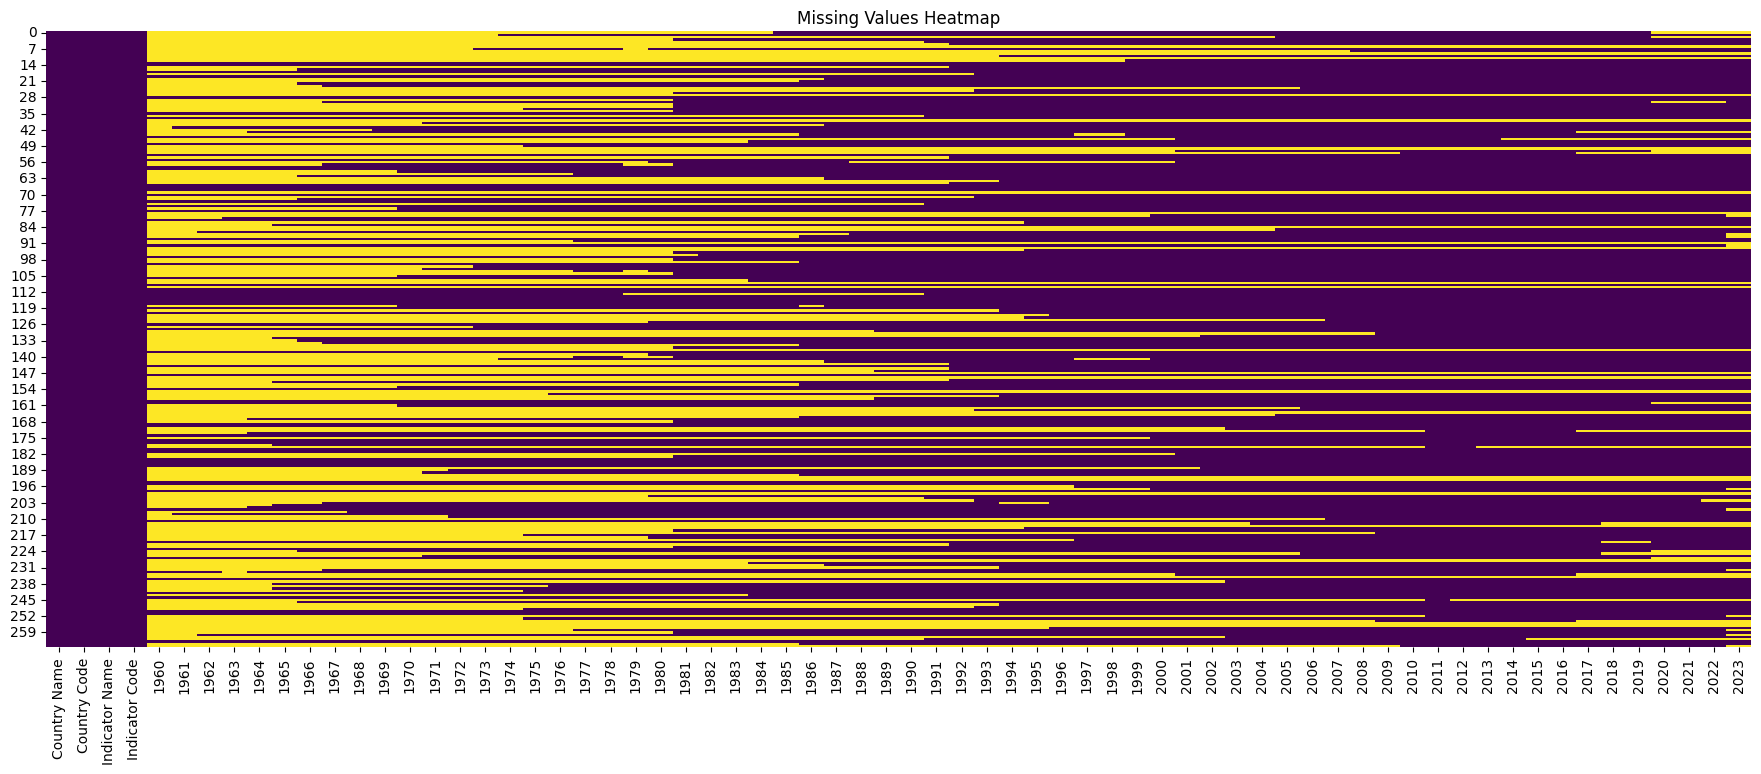

In [559]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df1, years_of_interest, selected_countries, country_column_name)

In [560]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df1.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df1[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df1 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df1 = melted_df1.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df1.columns.name = None  # Remove column name from pivot_table
pivoted_df1.head(40)  # Show a sample of the transformed dataset



,Country Name,Country Code,Year,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,2005,12.686269
1,Afghanistan,AFG,2006,6.784597
2,Afghanistan,AFG,2007,8.680571
3,Afghanistan,AFG,2008,26.418664
4,Afghanistan,AFG,2009,-6.811161
5,Afghanistan,AFG,2010,2.178538
6,Afghanistan,AFG,2011,11.804186
7,Afghanistan,AFG,2012,6.441213
8,Afghanistan,AFG,2013,7.385772
9,Afghanistan,AFG,2014,4.673996


In [561]:
pivoted_df1

,Country Name,Country Code,Year,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,2005,12.686269
1,Afghanistan,AFG,2006,6.784597
2,Afghanistan,AFG,2007,8.680571
3,Afghanistan,AFG,2008,26.418664
4,Afghanistan,AFG,2009,-6.811161
...,...,...,...,...
11034,Zimbabwe,ZWE,2018,10.618866
11035,Zimbabwe,ZWE,2019,255.304991
11036,Zimbabwe,ZWE,2020,557.201817
11037,Zimbabwe,ZWE,2021,98.546105


In [562]:
df2 = pd.read_csv("Supplemental Data/Current account balance in USD.csv")
df2.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
196,West Bank and Gaza,PSE,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-983700000.0,-1.424400e+09,-1.547545e+09,-1.038311e+09,-1.191789e+09,-856611412.2,-827870113.9,-485551312.1,-1.070557e+09,-1.587942e+09,-1.365346e+09,-1.233496e+09,-4.185272e+08,3.805993e+08,-1.143375e+09,-1.306944e+09,-2.069507e+09,-1.821136e+09,-1.996563e+09,-1.900768e+09,-1.939218e+09,-2.142546e+09,-2.129954e+09,-2.140378e+09,-1.779396e+09,-1.902806e+09,-1.777950e+09,-2.036626e+09,-2.895369e+09
179,Nauru,NRU,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862878e+07,2.994489e+07,2.367910e+07,1.976015e+07,3.486191e+07,4.585507e+07,2.602949e+07,-1.670171e+07,2.079370e+06,1.410993e+07,9.596973e+06,5.590168e+06,3.232666e+06,6.596611e+06,2.965544e+06,1.922550e+06
78,Faroe Islands,FRO,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.239700e+08,1.760800e+08,99190000.0,146200000.0,125740000.0,-6.560000e+06,1.297057e+08,3.118107e+07,2.124046e+07,-8.056960e+07,-3.057890e+07,-2.463550e+07,1.442763e+08,1.943044e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,"Congo, Dem. Rep.",COD,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.886000e+08,4.780000e+07,5.270000e+08,-1.510000e+08,-1.123100e+09,-2.173500e+09,-1.280602e+09,-1.260462e+09,-3.108803e+09,-1.722615e+09,-1.483759e+09,-1.504160e+09,-1.241424e+09,-1.672322e+09,-1.693232e+09,-1.052132e+09,-5.874070e+08,-3.148079e+09,-3.882716e+09


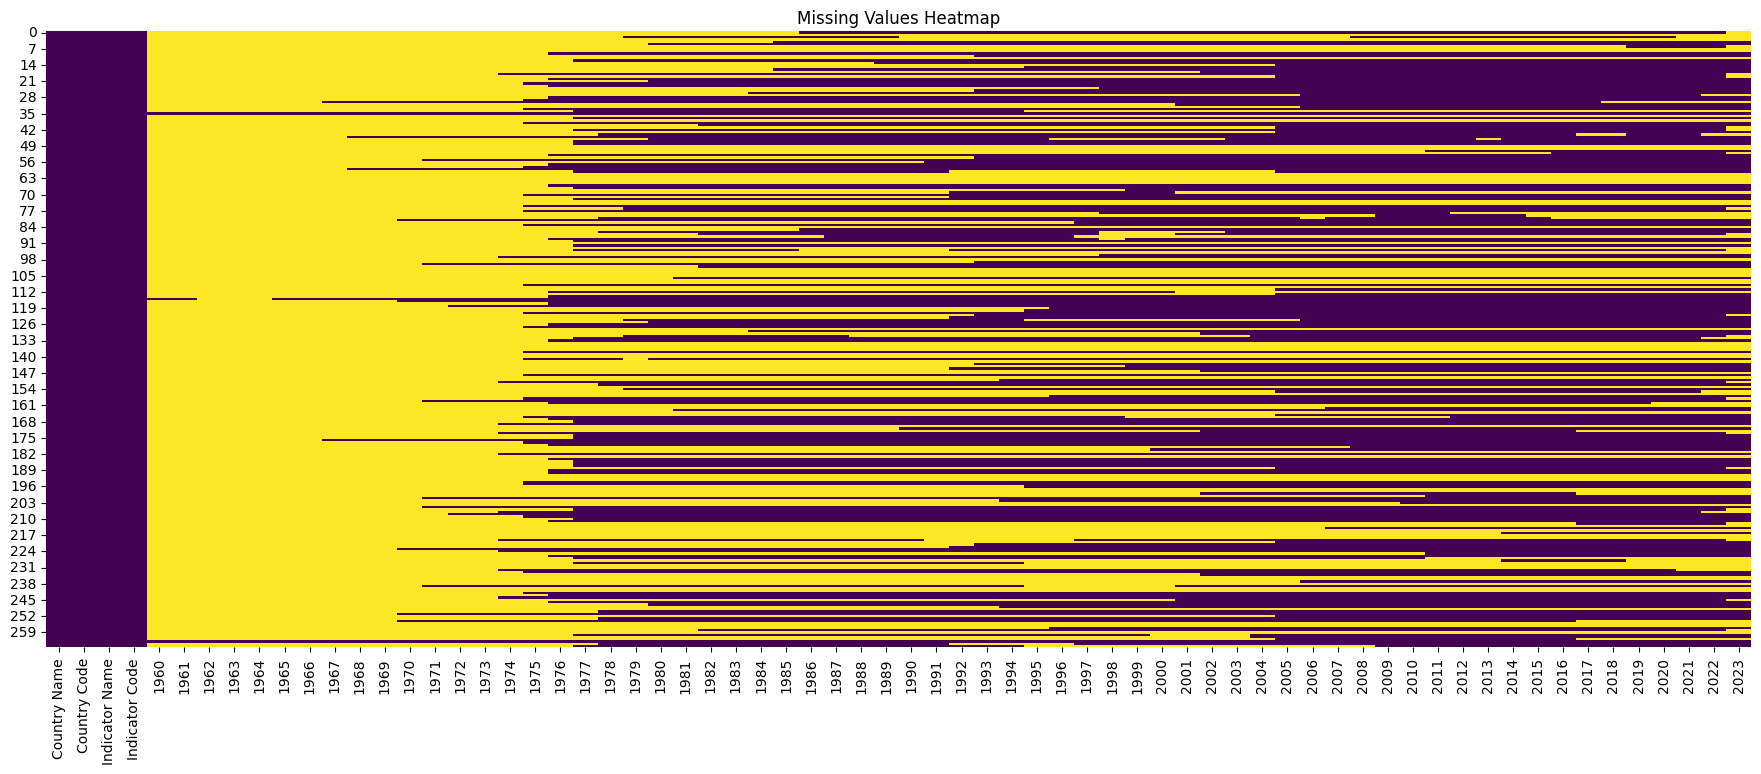

In [563]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df2, years_of_interest, selected_countries, country_column_name)

values similar to czech arent in there. so its missing. but South Korea is in there under the code KOR.we should merge by the code names. And the republic of Turkiye is just called turkiye in df2

I can't use the Country Code bc it is not in df. So i will change the values for Turkiye and South Korea in df. 

In [564]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df2.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df2[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df2 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df2 = melted_df2.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df2.columns.name = None  # Remove column name from pivot_table
pivoted_df2.head(40)  # Show a sample of the transformed dataset


,Country Name,Country Code,Year,"Current account balance (BoP, current US$)"
0,Afghanistan,AFG,1979,-9.960000e+07
1,Afghanistan,AFG,1980,5.360000e+07
2,Afghanistan,AFG,1981,-2.058000e+08
3,Afghanistan,AFG,1982,-6.730000e+07
4,Afghanistan,AFG,1983,-1.388000e+08
5,Afghanistan,AFG,1984,-4.506000e+08
6,Afghanistan,AFG,1985,-2.432000e+08
7,Afghanistan,AFG,1986,-5.372000e+08
8,Afghanistan,AFG,1987,-1.669000e+08
9,Afghanistan,AFG,1988,2.620000e+07


In [565]:
df3 = pd.read_csv("Supplemental Data/Export of goods and services as a percentage of GDP.csv")
df3.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
239,Tonga,TON,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.329902,26.935815,33.866027,28.789427,26.078165,30.062215,25.375256,27.588123,18.657766,26.608023,30.128608,25.712353,30.926721,22.736559,25.103299,33.870179,22.903297,23.641967,19.894089,17.184930,16.958995,20.119587,20.860193,19.587975,15.752612,15.214164,13.366824,18.256306,19.387832,19.564541,17.841847,14.560176,12.219925,15.989790,13.621168,12.500560,16.252915,17.056322,20.303634,16.927036,16.940112,21.662204,22.176135,21.376714,22.765673,20.090422,11.082543,11.559641,NaN
247,Uganda,UGA,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,27.329451,24.418229,24.107405,28.290939,29.897858,25.577714,25.567322,25.300333,23.940621,21.528693,23.352229,19.81626,19.389671,16.551497,14.719467,8.650405,11.388060,9.152644,13.652858,19.401363,19.443842,16.077170,8.381171,8.659426,12.692423,13.738525,12.810112,8.247099,7.572671,7.954401,7.240721,7.464430,8.761089,7.062523,8.740532,11.791992,11.961113,13.359514,9.639048,12.251574,10.651409,11.518083,11.213279,11.386725,12.696881,14.179700,15.275413,16.725069,24.280142,18.613566,13.824483,12.855724,15.491729,16.513036,14.948211,12.877325,12.427164,16.661129,15.087053,17.109058,15.414799,15.781008,12.021995,11.601709
23,"Bahamas, The",BHS,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.650771,82.664584,68.871726,70.381188,67.381703,65.785972,66.568560,63.588261,64.790799,63.817998,61.322773,NaN,53.831483,54.160771,50.951092,50.247025,51.966688,51.021479,49.549140,48.037684,36.880405,34.657160,36.456890,38.047563,34.072589,36.175455,35.810234,38.215231,38.759887,38.309277,40.091954,39.493635,34.190680,34.953287,37.435269,38.127309,40.163335,37.928395,36.337700,33.217257,32.281579,35.839978,35.564143,24.240325,29.497137,39.427088,39.746138
133,St. Lucia,LCA,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


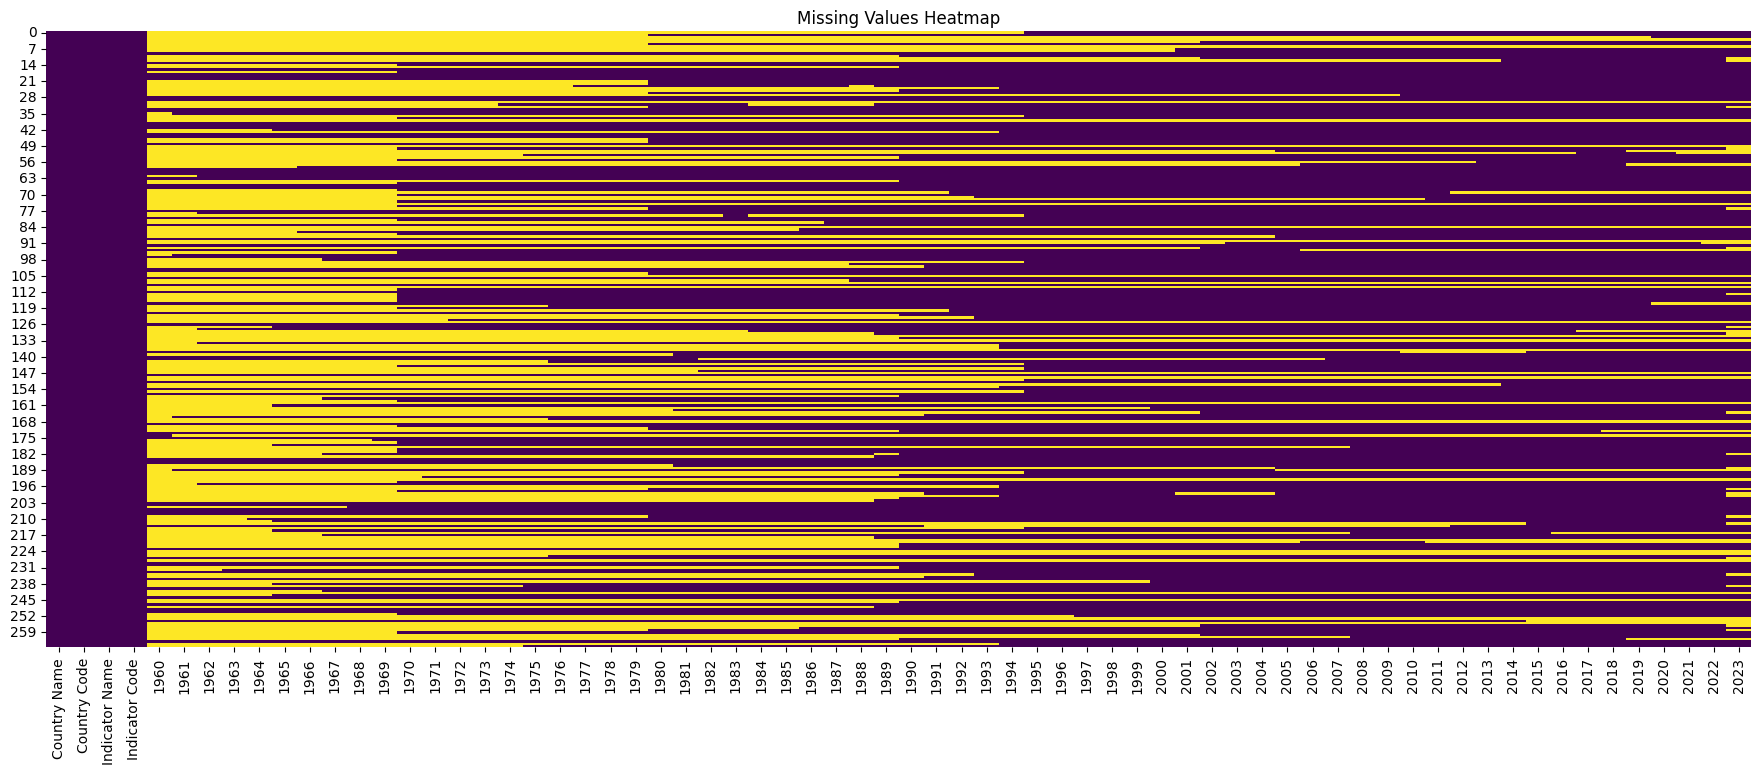

In [566]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df3, years_of_interest, selected_countries, country_column_name)

In [567]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df3.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df3[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df3 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df3 = melted_df3.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df3.columns.name = None  # Remove column name from pivot_table
pivoted_df3.head(40)  # Show a sample of the transformed dataset


,Country Name,Country Code,Year,Exports of goods and services (% of GDP)
0,Afghanistan,AFG,2020,10.420817
1,Afghanistan,AFG,2021,14.342153
2,Afghanistan,AFG,2022,18.380042
3,Afghanistan,AFG,2023,16.775136
4,Africa Eastern and Southern,AFE,1980,28.100753
5,Africa Eastern and Southern,AFE,1981,22.922414
6,Africa Eastern and Southern,AFE,1982,20.650888
7,Africa Eastern and Southern,AFE,1983,20.251093
8,Africa Eastern and Southern,AFE,1984,20.914148
9,Africa Eastern and Southern,AFE,1985,22.221909


In [568]:
df4 = pd.read_csv("Supplemental Data/Foreign direct investment in USD.csv")
df4.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
59,Dominican Republic,DOM,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71600000.0,65000000.0,43500000.0,34500000.0,5.360000e+07,63900000.00,6.000000e+07,71500000.00,63600000.00,17100000.00,92700000.00,79700000.00,-1400000.0,48200000.00,6.850000e+07,36200000.00,50000000.00,89000000.00,1.061000e+08,110000000.0,1.328000e+08,1.450000e+08,179700000.0,1.907000e+08,2.081000e+08,4.174000e+08,1.342000e+08,4.087000e+08,668900000.0,1.344900e+09,9.890000e+08,1.087900e+09,9.260000e+08,6.165300e+08,9.344800e+08,1.118400e+09,1.528700e+09,2.252900e+09,2.728400e+09,1.695300e+09,1.820200e+09,2.197500e+09,3.415900e+09,1.599900e+09,2.385300e+09,2.227300e+09,2.516100e+09,3.597900e+09,2.744500e+09,2.829200e+09,2.460600e+09,3.349700e+09,4.050000e+09,4.750500e+09
31,Brunei Darussalam,BRN,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85530000.0,-17550000.0,-3779999.9,290000.0,2.080000e+06,850000.00,-3.089000e+07,-3290000.00,4570000.00,350000.00,-19570000.00,-11109999.90,6210000.0,3620000.00,8.000000e+05,3669999.90,-6049999.90,-70000.00,4.600000e+05,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.069464e+07,2.296720e+08,1.238209e+08,1.132059e+08,1.750685e+08,8.783913e+07,2.576357e+08,2.221845e+08,3.255868e+08,NaN,NaN,NaN,NaN,5.739062e+08,1.712892e+08,-1.505508e+08,4.679276e+08,5.162026e+08,3.732568e+08,5.655423e+08,2.047494e+08,-2.924163e+08,-5.099264e+07
252,Uzbekistan,UZB,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.134910e+08,2.071564e+08,6.675038e+08,5.479612e+08,6.130939e+08,1.662748e+09,1.615052e+09,7.442446e+08,6.915762e+08,8.086760e+08,1.041199e+09,1.662886e+09,1.798299e+09,6.246865e+08,2.316483e+09,1.728248e+09,2.280290e+09,2.657306e+09,2.156721e+09
224,Eswatini,SWZ,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670000.0,60000.0,3.532128e+06,14469084.23,7.360000e+06,20009999.98,21734999.98,55461694.13,26449804.39,37033705.36,-13630304.1,-5654788.62,5.016005e+06,11621254.78,31115542.53,56285915.42,5.058352e+07,67183250.7,3.010836e+07,8.213478e+07,87306719.2,7.192062e+07,6.326211e+07,5.175616e+07,2.171584e+07,-1.531393e+07,152720441.7,9.827049e+07,9.065801e+07,2.933008e+07,9.294531e+07,-6.019068e+07,6.958201e+07,-4.585034e+07,1.210311e+08,3.749385e+07,1.057294e+08,6.570586e+07,1.356604e+08,9.870832e+07,2.648000e+07,8.179016e+07,2.578264e+07,3.149809e+07,2.685208e+07,-5.764759e+07,3.113083e+07,1.279709e+08,3.878763e+07,1.128653e+08,1.335025e+07,2.813255e+07


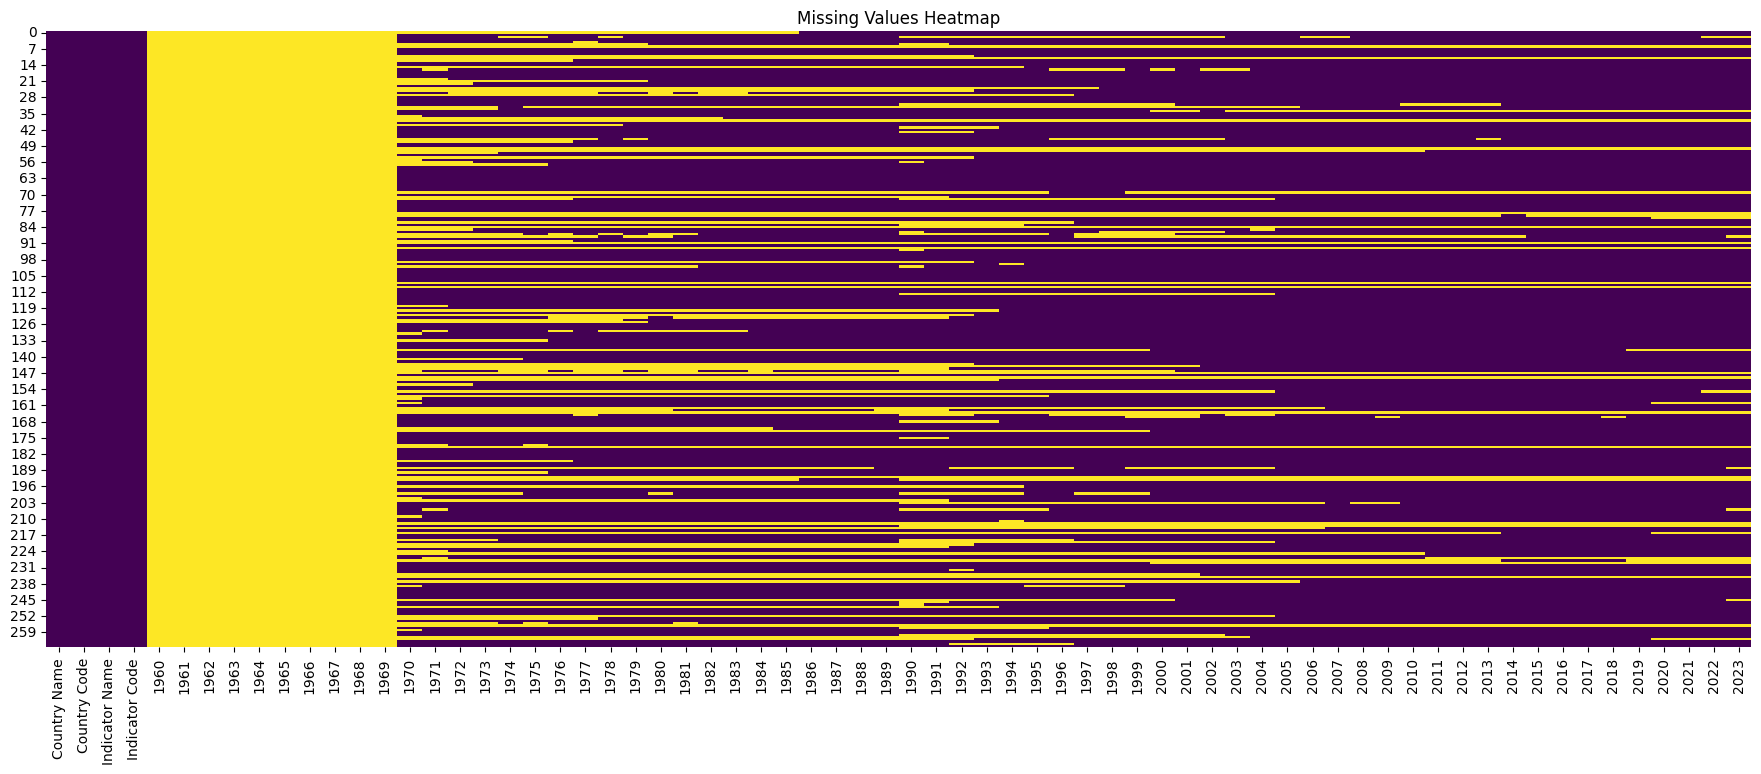

In [569]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df4, years_of_interest, selected_countries, country_column_name)

In [570]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df4.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df4[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df4 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df4 = melted_df4.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df4.columns.name = None  # Remove column name from pivot_table
pivoted_df4.head(40)  # Show a sample of the transformed dataset


,Country Name,Country Code,Year,"Foreign direct investment, net inflows (BoP, current US$)"
0,Afghanistan,AFG,1970,2.300000e+05
1,Afghanistan,AFG,1971,4.500000e+05
2,Afghanistan,AFG,1972,1.500000e+05
3,Afghanistan,AFG,1973,2.700000e+05
4,Afghanistan,AFG,1976,4.000000e+04
5,Afghanistan,AFG,1977,-2.400000e+05
6,Afghanistan,AFG,1979,1.200000e+06
7,Afghanistan,AFG,1980,9.000000e+06
8,Afghanistan,AFG,1981,1.800000e+05
9,Afghanistan,AFG,1982,1.000000e+05


In [571]:
df5 = pd.read_csv("Supplemental Data/Government expenditures.csv")
df5.sample(40)

,Economy_Label,Year,GovernmentExpenditure_Label,US_dollars_at_current_prices_in_millions_Value,Unnamed: 4,Unnamed: 5
22360,South Africa,2013,Economic affairs n.e.c.,0.0,NaN,NaN
3099,Bulgaria,2019,General public services,2462.0,NaN,NaN
7600,Finland,2010,RandD Economic affairs,1533.0,NaN,NaN
4016,"China, Hong Kong SAR",2017,Health,9880.0,NaN,NaN
18737,Poland,2016,"Recreation, culture and religion",5013.0,NaN,NaN
22440,South Africa,2018,Transport,8972.0,NaN,NaN
22903,Spain,2020,Social protection,283292.0,NaN,NaN
8199,France,2020,Health,235198.0,NaN,NaN
3209,Canada,2012,Total function,667274.0,NaN,NaN
11358,Israel,2011,Education,17321.0,NaN,NaN


In [572]:
df5['Country Name'] = df5['Economy_Label']

In [573]:
import pandas as pd

# List of expenditure labels you want to filter by
expenditure_labels = [
    'Total function',  'Mining, manufacturing and construction' ,'Housing and community amenities'
]

# Assuming df8 is your dataframe, filter the rows where 'GovernmentExpenditure_Label' is in the expenditure_labels list
df5_filtered = df5[df5['GovernmentExpenditure_Label'].isin(expenditure_labels)]

# Now df8_filtered will only contain rows with the specified expenditure labels
df5_filtered


,Economy_Label,Year,GovernmentExpenditure_Label,US_dollars_at_current_prices_in_millions_Value,Unnamed: 4,Unnamed: 5,Country Name
0,Afghanistan,2006,Total function,2229.0,NaN,NaN,Afghanistan
2,Afghanistan,2006,"Mining, manufacturing and construction",7.0,NaN,NaN,Afghanistan
7,Afghanistan,2006,Housing and community amenities,36.0,NaN,NaN,Afghanistan
15,Afghanistan,2007,Total function,3303.0,NaN,NaN,Afghanistan
17,Afghanistan,2007,"Mining, manufacturing and construction",30.0,NaN,NaN,Afghanistan
...,...,...,...,...,...,...,...
25705,Yemen,2010,Housing and community amenities,499.0,NaN,NaN,Yemen
25713,Yemen,2011,Total function,8416.0,NaN,NaN,Yemen
25715,Yemen,2011,Housing and community amenities,157.0,NaN,NaN,Yemen
25723,Yemen,2012,Total function,12282.0,NaN,NaN,Yemen


In [574]:
df5_filtered = df5_filtered[['Year', 'GovernmentExpenditure_Label', 'US_dollars_at_current_prices_in_millions_Value', 'Country Name']]

In [575]:
df5_filtered

,Year,GovernmentExpenditure_Label,US_dollars_at_current_prices_in_millions_Value,Country Name
0,2006,Total function,2229.0,Afghanistan
2,2006,"Mining, manufacturing and construction",7.0,Afghanistan
7,2006,Housing and community amenities,36.0,Afghanistan
15,2007,Total function,3303.0,Afghanistan
17,2007,"Mining, manufacturing and construction",30.0,Afghanistan
...,...,...,...,...
25705,2010,Housing and community amenities,499.0,Yemen
25713,2011,Total function,8416.0,Yemen
25715,2011,Housing and community amenities,157.0,Yemen
25723,2012,Total function,12282.0,Yemen


In [576]:
import pandas as pd

# Select only the relevant columns
df5 = df5[['Year', 'GovernmentExpenditure_Label', 'US_dollars_at_current_prices_in_millions_Value', 'Country Name']]

# Rename for clarity
df5.rename(columns={'US_dollars_at_current_prices_in_millions_Value': 'Value'}, inplace=True)

# Pivot the table to get each category as its own column
df5_pivot = df5.pivot_table(index=['Country Name', 'Year'], 
                            columns='GovernmentExpenditure_Label', 
                            values='Value', 
                            aggfunc='sum').reset_index()

# Rename columns for better understanding
df5_pivot.rename(columns={'Total function': 'Total function in mill'}, inplace=True)

# Create the ratio columns
df5_pivot['Mining, manufacturing and construction/Total function'] = (
    df5_pivot['Mining, manufacturing and construction'] / df5_pivot['Total function in mill']
)

df5_pivot['Housing and community amenities/Total function'] = (
    df5_pivot['Housing and community amenities'] / df5_pivot['Total function in mill']
)

# Keep only the relevant columns
df5_final = df5_pivot[['Country Name', 'Year', 'Total function in mill', 
                       'Mining, manufacturing and construction/Total function', 
                       'Housing and community amenities/Total function']]

# Display the final DataFrame
df5_final.head()


GovernmentExpenditure_Label,Country Name,Year,Total function in mill,"Mining, manufacturing and construction/Total function",Housing and community amenities/Total function
0,Afghanistan,2006,2229.0,0.003140,0.016151
1,Afghanistan,2007,3303.0,0.009083,0.032092
2,Afghanistan,2008,9288.0,0.001507,0.011628
3,Afghanistan,2009,8940.0,0.001678,0.015660
4,Afghanistan,2010,12898.0,0.003411,0.007443


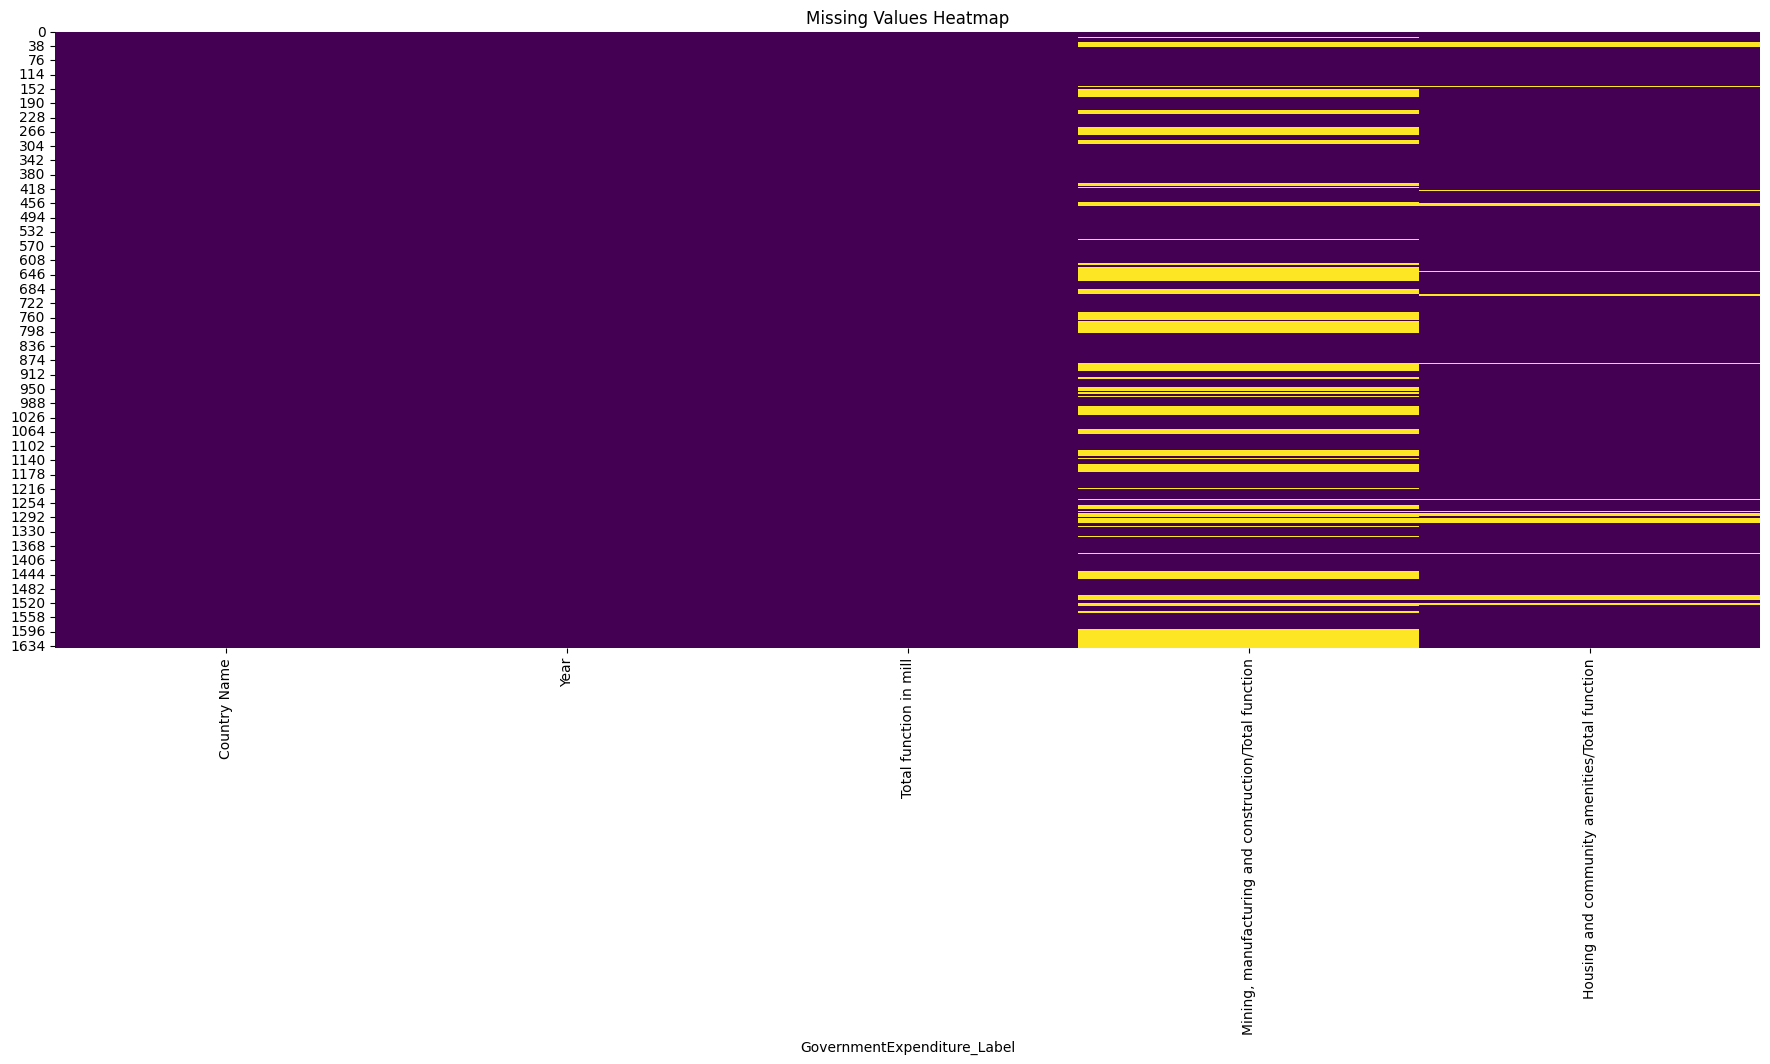

In [577]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df5_final, years_of_interest, selected_countries, country_column_name)

In [578]:
df_czech = df5_final[df5_final["Country Name"] == "Slovak Republic"]
df_czech

GovernmentExpenditure_Label,Country Name,Year,Total function in mill,"Mining, manufacturing and construction/Total function",Housing and community amenities/Total function


In [579]:
from thefuzz import fuzz, process  

# Define the target country
target_country = "Mexico"

# Get matches with at least 80% similarity
matches = [country for country in df5_final["Country Name"].unique() if fuzz.ratio(target_country, country) >= 10]

# Filter the DataFrame based on these matches
df_czech_fuzzy = df5_final[df5_final["Country Name"].isin(matches)]

# Display results
print(matches)
df_czech_fuzzy


['Afghanistan', 'Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia (Plurinational State of)', 'Brazil', 'Bulgaria', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Czechia', 'Denmark', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Kenya', 'Kiribati', 'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova, Republic of', 'Mongolia', 'Myanmar', 'Nepal', 'Netherlands (Kingdom of the)', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Samoa', 'San Marino', 'Serbia', 'Serbia and Montenegro', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland, Liechtenstein'

GovernmentExpenditure_Label,Country Name,Year,Total function in mill,"Mining, manufacturing and construction/Total function",Housing and community amenities/Total function
0,Afghanistan,2006,2229.0,0.003140,0.016151
1,Afghanistan,2007,3303.0,0.009083,0.032092
2,Afghanistan,2008,9288.0,0.001507,0.011628
3,Afghanistan,2009,8940.0,0.001678,0.015660
4,Afghanistan,2010,12898.0,0.003411,0.007443
...,...,...,...,...,...
1634,Yemen,2008,11151.0,NaN,0.045736
1635,Yemen,2009,9003.0,NaN,0.056537
1636,Yemen,2010,9519.0,NaN,0.052421
1637,Yemen,2011,8416.0,NaN,0.018655


Mexico is not listed. 

In [580]:
df5_final['Country Name'] = df5_final['Country Name'].replace("Korea, Republic of", "Korea, Rep.")

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\1521007447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_final['Country Name'] = df5_final['Country Name'].replace("Korea, Republic of", "Korea, Rep.")


In [581]:
df5_final['Country Name'] = df5_final['Country Name'].replace("Netherlands (Kingdom of the)", "Netherlands")

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\3947884241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_final['Country Name'] = df5_final['Country Name'].replace("Netherlands (Kingdom of the)", "Netherlands")


In [582]:
df5_final['Country Name'] = df5_final['Country Name'].replace("Slovakia", "Slovak Republic")

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\2812089100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_final['Country Name'] = df5_final['Country Name'].replace("Slovakia", "Slovak Republic")


In [583]:
df5_final['Country Name'] = df5_final['Country Name'].replace("Switzerland, Liechtenstein", "Switzerland")

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\4158571099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_final['Country Name'] = df5_final['Country Name'].replace("Switzerland, Liechtenstein", "Switzerland")


I gotta keep in mind for df5 that Switz and the small country of liechnstein is included. other indicators probably dont.

In [584]:
df5_final['Country Name'] = df5_final['Country Name'].replace("United States of America", "United States")

C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\308115607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_final['Country Name'] = df5_final['Country Name'].replace("United States of America", "United States")


In [585]:
df5_final

GovernmentExpenditure_Label,Country Name,Year,Total function in mill,"Mining, manufacturing and construction/Total function",Housing and community amenities/Total function
0,Afghanistan,2006,2229.0,0.003140,0.016151
1,Afghanistan,2007,3303.0,0.009083,0.032092
2,Afghanistan,2008,9288.0,0.001507,0.011628
3,Afghanistan,2009,8940.0,0.001678,0.015660
4,Afghanistan,2010,12898.0,0.003411,0.007443
...,...,...,...,...,...
1634,Yemen,2008,11151.0,NaN,0.045736
1635,Yemen,2009,9003.0,NaN,0.056537
1636,Yemen,2010,9519.0,NaN,0.052421
1637,Yemen,2011,8416.0,NaN,0.018655


In [586]:
df6 = pd.read_csv("Supplemental Data/Import of goods and services as a percentage of GDP.csv")
df6.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
238,Middle East & North Africa (IDA & IBRD countries),TMN,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,19.219847,19.685667,19.55907,19.300598,19.974437,21.437044,21.580480,21.380106,22.719311,27.894479,37.207453,31.437716,33.764432,29.419286,26.788256,31.260597,36.801804,33.439943,28.589754,25.032424,22.985623,18.898061,19.248507,23.462548,26.205940,21.364884,31.939796,30.353152,30.793508,27.375224,26.777076,25.229051,26.076053,26.782791,26.750000,27.378280,28.327977,29.571499,30.837921,33.222477,33.093445,30.583070,30.659797,32.735800,32.175077,29.449849,26.713036,28.987280,30.220902,30.448740,29.144542,26.817385,29.345115,31.644534,31.558793,27.683201,27.959077,30.296559,31.513232
114,Iceland,ISL,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.755340,43.351627,36.372334,37.161376,40.631312,41.154300,33.759334,33.300145,33.162590,36.351634,35.068700,35.666787,36.465511,37.087632,37.606526,39.608040,34.327974,34.907496,32.273527,30.913771,31.964448,32.160741,30.029225,29.270969,30.264401,31.549196,35.306223,35.071494,38.114971,36.973081,39.009101,37.793845,33.916811,35.577069,38.021923,42.092229,47.130591,41.830812,42.387624,40.674938,41.900164,46.863165,49.159421,45.541772,45.146494,44.166486,40.848987,41.246707,42.590145,39.149497,34.665431,39.000639,45.833346,43.150979
261,Kosovo,XKX,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.540044,58.527615,60.508312,61.199709,56.841948,52.099626,53.549167,51.569049,51.191408,53.081292,57.261620,56.440801,53.912870,65.229248,71.386375,70.311383
102,IBRD only,IBD,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,13.549172,13.266568,12.43031,12.49371,12.155388,11.473191,11.903535,11.95400,11.951290,11.655477,12.052114,12.336492,12.270721,13.166490,16.778836,18.635737,17.869793,18.717398,18.435434,18.887273,21.688777,21.010532,19.971484,18.242493,17.418987,17.018836,15.897422,16.491494,18.557716,19.331520,18.193460,18.784553,24.638564,22.213007,21.331008,22.241414,21.844137,22.339189,21.714978,22.278554,24.185009,24.060019,25.220773,26.695545,28.830541,28.670449,28.707221,28.518826,29.195131,24.987713,26.139332,27.042679,26.898747,26.499446,25.969439,23.806680,22.949495,23.688427,24.869883,23.821968,22.057267,24.273856,25.681128,24.571001


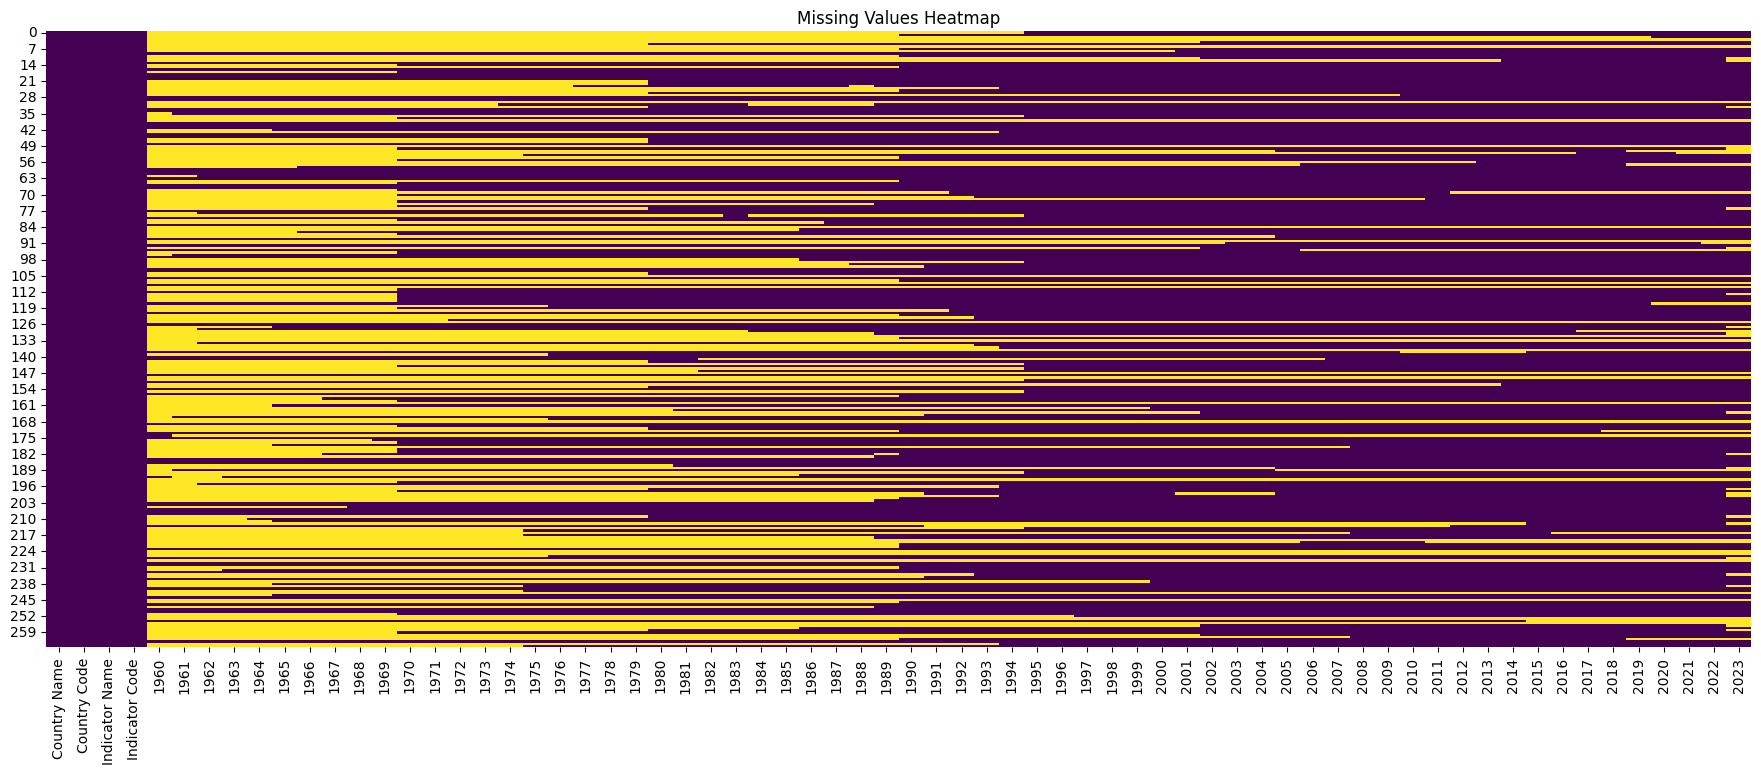

In [587]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df6, years_of_interest, selected_countries, country_column_name)

In [588]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df6.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df6[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df6 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df6 = melted_df6.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df6.columns.name = None  # Remove column name from pivot_table
pivoted_df6.head(40)  # Show a sample of the transformed dataset


,Country Name,Country Code,Year,Imports of goods and services (% of GDP)
0,Afghanistan,AFG,2020,36.289077
1,Afghanistan,AFG,2021,37.069564
2,Afghanistan,AFG,2022,54.505427
3,Afghanistan,AFG,2023,50.498207
4,Africa Eastern and Southern,AFE,1990,19.756420
5,Africa Eastern and Southern,AFE,1991,19.618819
6,Africa Eastern and Southern,AFE,1992,21.179882
7,Africa Eastern and Southern,AFE,1993,21.283466
8,Africa Eastern and Southern,AFE,1994,24.109435
9,Africa Eastern and Southern,AFE,1995,25.961289


In [589]:
df7 = pd.read_csv("Supplemental Data/Labor force participation rate modeled.csv")
df7.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
97,Honduras,HND,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,59.086000,58.895000,58.680000,58.842000,58.646000,58.708000,58.60700,58.565000,58.7780,57.801000,56.792000,55.778000,54.75800,53.733000,52.705000,49.79500,48.323000,49.444000,50.437000,51.461000,49.891000,48.112000,53.175000,53.797000,54.588000,53.382000,54.972000,57.828000,55.196000,54.382000,54.193000,54.012000,54.075000
101,Hungary,HUN,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,43.263000,43.698000,40.972000,39.068000,38.408000,34.087000,34.47100,39.702000,39.8380,37.808000,34.133000,32.367000,30.64000,27.300000,27.111000,26.75800,25.760000,25.147000,24.676000,24.812000,24.298000,25.701000,27.399000,29.536000,31.035000,32.306000,32.458000,32.284000,32.212000,31.213000,31.786000,30.824000,31.164000
196,West Bank and Gaza,PSE,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,28.915000,28.632000,28.569000,28.499000,28.345000,28.481000,27.99500,27.432000,27.1310,27.633000,23.996000,21.758000,23.96900,22.988000,23.209000,23.51000,24.742000,25.178000,24.957000,24.877000,26.848000,27.949000,27.699000,28.027000,30.886000,30.975000,31.443000,30.502000,30.270000,26.229000,28.837000,30.805000,NaN
181,OECD members,OED,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,53.513785,52.898695,52.052778,51.983396,51.457229,50.967451,50.68219,50.747843,50.6546,50.455501,49.842244,49.159221,48.44708,48.103763,48.055644,47.92209,47.552075,47.356371,46.538415,45.838108,45.774781,45.639516,45.662723,45.621496,45.612349,45.686393,45.722435,45.874848,46.307513,44.032448,45.631737,46.255442,46.819825


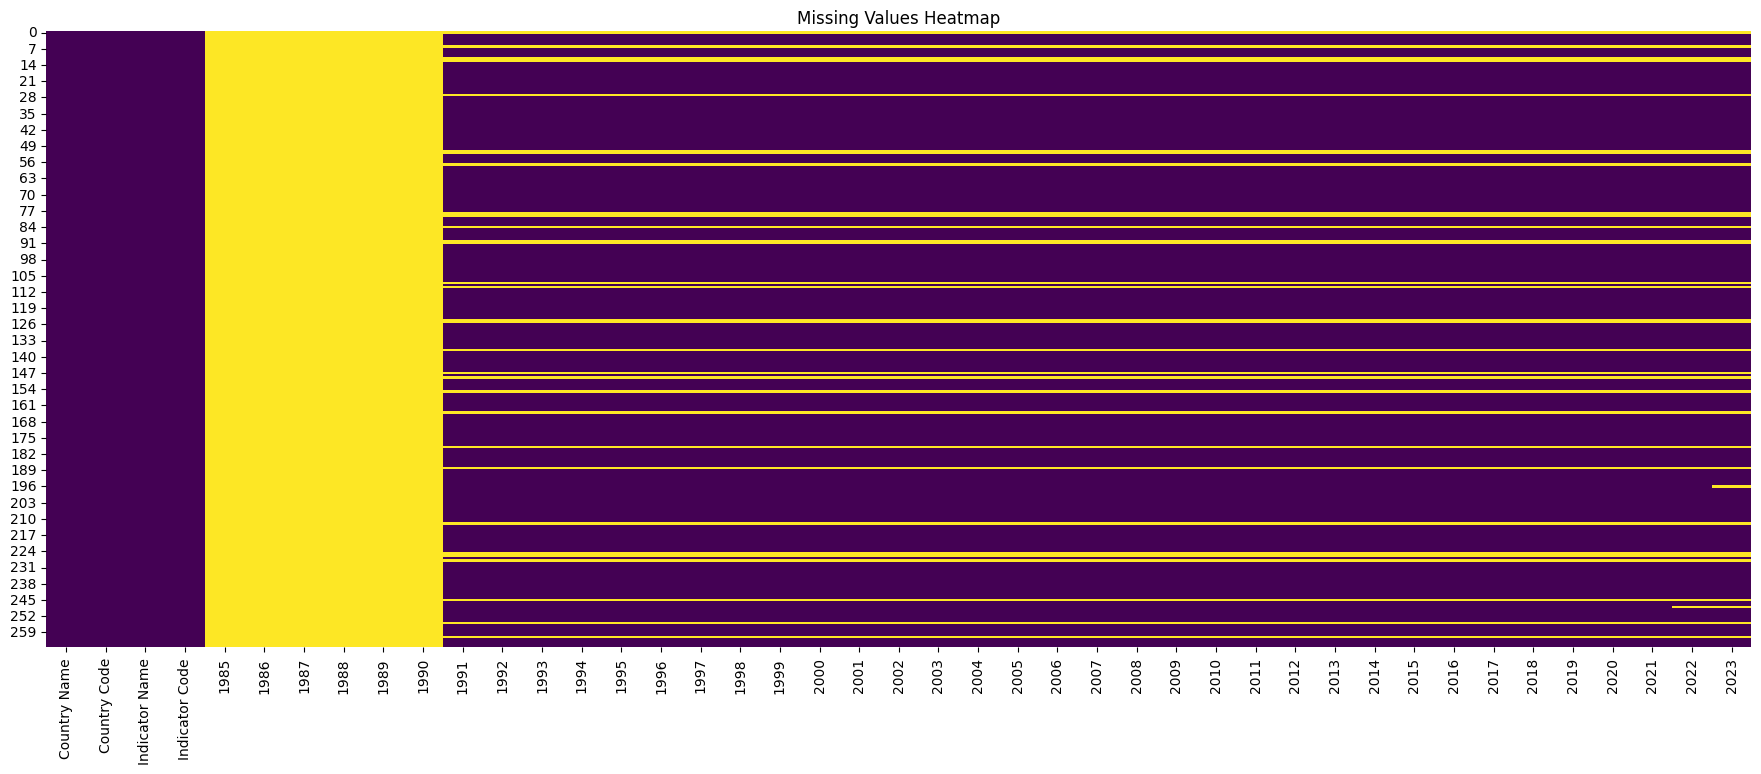

In [590]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df7, years_of_interest, selected_countries, country_column_name)

In [591]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df7.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df7[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df7 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df7 = melted_df7.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df7.columns.name = None  # Remove column name from pivot_table
pivoted_df7.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,38.799000
1,Afghanistan,AFG,1992,38.774000
2,Afghanistan,AFG,1993,38.690000
3,Afghanistan,AFG,1994,38.564000
4,Afghanistan,AFG,1995,38.424000
5,Afghanistan,AFG,1996,38.290000
6,Afghanistan,AFG,1997,38.205000
7,Afghanistan,AFG,1998,38.180000
8,Afghanistan,AFG,1999,38.205000
9,Afghanistan,AFG,2000,38.266000


In [592]:
df8 = pd.read_csv("Supplemental Data/National GDP in USD.csv")
df8.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
115,Israel,ISR,GDP (current US$),NY.GDP.MKTP.CD,3.064825e+09,3.701628e+09,2.960589e+09,3.529315e+09,4.016794e+09,4.320962e+09,4.694476e+09,4.753451e+09,5.448187e+09,6.286036e+09,7.392816e+09,7.041133e+09,9.206101e+09,1.188238e+10,1.714265e+10,1.611421e+10,1.592798e+10,1.822464e+10,1.766893e+10,2.256914e+10,2.534951e+10,2.683368e+10,2.920266e+10,3.261700e+10,3.059050e+10,2.885376e+10,3.576972e+10,4.297213e+10,5.255627e+10,5.234917e+10,6.190521e+10,7.087108e+10,7.931480e+10,7.971228e+10,9.057693e+10,1.053080e+11,1.148670e+11,1.192460e+11,1.203580e+11,1.211670e+11,1.362250e+11,1.346210e+11,1.250550e+11,1.313150e+11,1.398990e+11,1.471030e+11,1.587230e+11,1.840690e+11,2.205520e+11,2.124540e+11,2.389130e+11,2.674060e+11,2.629180e+11,2.976340e+11,3.140900e+11,3.027230e+11,3.209590e+11,3.572270e+11,3.751500e+11,3.996510e+11,4.117290e+11,4.897080e+11,5.250000e+11,5.136110e+11
223,Sweden,SWE,GDP (current US$),NY.GDP.MKTP.CD,1.593026e+10,1.732982e+10,1.879428e+10,2.034237e+10,2.268575e+10,2.496423e+10,2.715503e+10,2.947522e+10,3.127823e+10,3.396769e+10,3.803766e+10,4.150663e+10,4.888373e+10,5.931952e+10,6.591839e+10,8.276618e+10,8.923354e+10,9.433287e+10,1.042920e+11,1.232090e+11,1.418880e+11,1.295000e+11,1.142160e+11,1.048630e+11,1.090440e+11,1.139590e+11,1.502820e+11,1.827460e+11,2.066890e+11,2.176350e+11,2.614700e+11,2.738350e+11,2.839120e+11,2.126470e+11,2.287020e+11,2.670530e+11,2.919520e+11,2.682520e+11,2.708900e+11,2.743200e+11,2.629050e+11,2.424990e+11,2.673730e+11,3.340740e+11,3.845470e+11,3.916900e+11,4.225300e+11,4.900500e+11,5.146170e+11,4.343140e+11,4.927530e+11,5.705410e+11,5.497420e+11,5.841280e+11,5.777300e+11,5.016980e+11,5.142180e+11,5.360840e+11,5.513120e+11,5.321690e+11,5.451480e+11,6.371870e+11,5.798960e+11,5.849600e+11
61,East Asia & Pacific (excluding high income),EAP,GDP (current US$),NY.GDP.MKTP.CD,8.075236e+10,7.113948e+10,6.488494e+10,7.018039e+10,8.106868e+10,9.446296e+10,1.033480e+11,1.003440e+11,1.014450e+11,1.140750e+11,1.270310e+11,1.364210e+11,1.553350e+11,1.953940e+11,2.214360e+11,2.485140e+11,2.526850e+11,2.912420e+11,2.826730e+11,3.272970e+11,3.776110e+11,4.032020e+11,4.234610e+11,4.433970e+11,4.804190e+11,5.260230e+11,5.246300e+11,5.185510e+11,5.755910e+11,6.222230e+11,6.667070e+11,7.235160e+11,8.114060e+11,8.906180e+11,1.071870e+12,1.322030e+12,1.518330e+12,1.570610e+12,1.433200e+12,1.577920e+12,1.736180e+12,1.847280e+12,2.044580e+12,2.314250e+12,2.683480e+12,3.108470e+12,3.743850e+12,4.733260e+12,5.988920e+12,6.493360e+12,7.903110e+12,9.653900e+12,1.076370e+13,1.187460e+13,1.280550e+13,1.332940e+13,1.362110e+13,1.488830e+13,1.664890e+13,1.722280e+13,1.749630e+13,2.084990e+13,2.112490e+13,2.116280e+13
142,Late-demographic dividend,LTE,GDP (current US$),NY.GDP.MKTP.CD,1.830400e+11,1.701000e+11,1.732840e+11,1.891180e+11,2.074400e+11,2.325490e+11,2.589920e+11,2.602740e+11,2.647870e+11,2.951970e+11,3.356750e+11,3.734270e+11,4.296440e+11,5.579500e+11,6.706120e+11,7.407550e+11,7.988660e+11,9.267390e+11,9.645510e+11,1.148400e+12,1.316880e+12,1.380130e+12,1.393000e+12,1.289280e+12,1.345560e+12,1.454660e+12,1.545910e+12,1.632410e+12,1.781580e+12,1.899400e+12,2.045120e+12,1.981020e+12,2.019420e+12,2.102260e+12,2.441350e+12,3.024940e+12,3.336410e+12,3.493230e+12,3.366690e+12,3.112220e+12,3.414600e+12,3.529670e+12,3.741290e+12,4.262680e+12,5.122700e+12,6.178900e+12,7.456060e+12,9.390660e+12,1.167630e+13,1.127980e+13,1.356800e+13,1.653700e+13,1.768680e+13,1.905150e+13,1.978810e+13,1.856530e+13,1.860550e+13,2.064770e+13,2.264130e+13,2.307020e+13,2.255320e+13,2.691040e+13,2.807940e+13,2.834850e+13


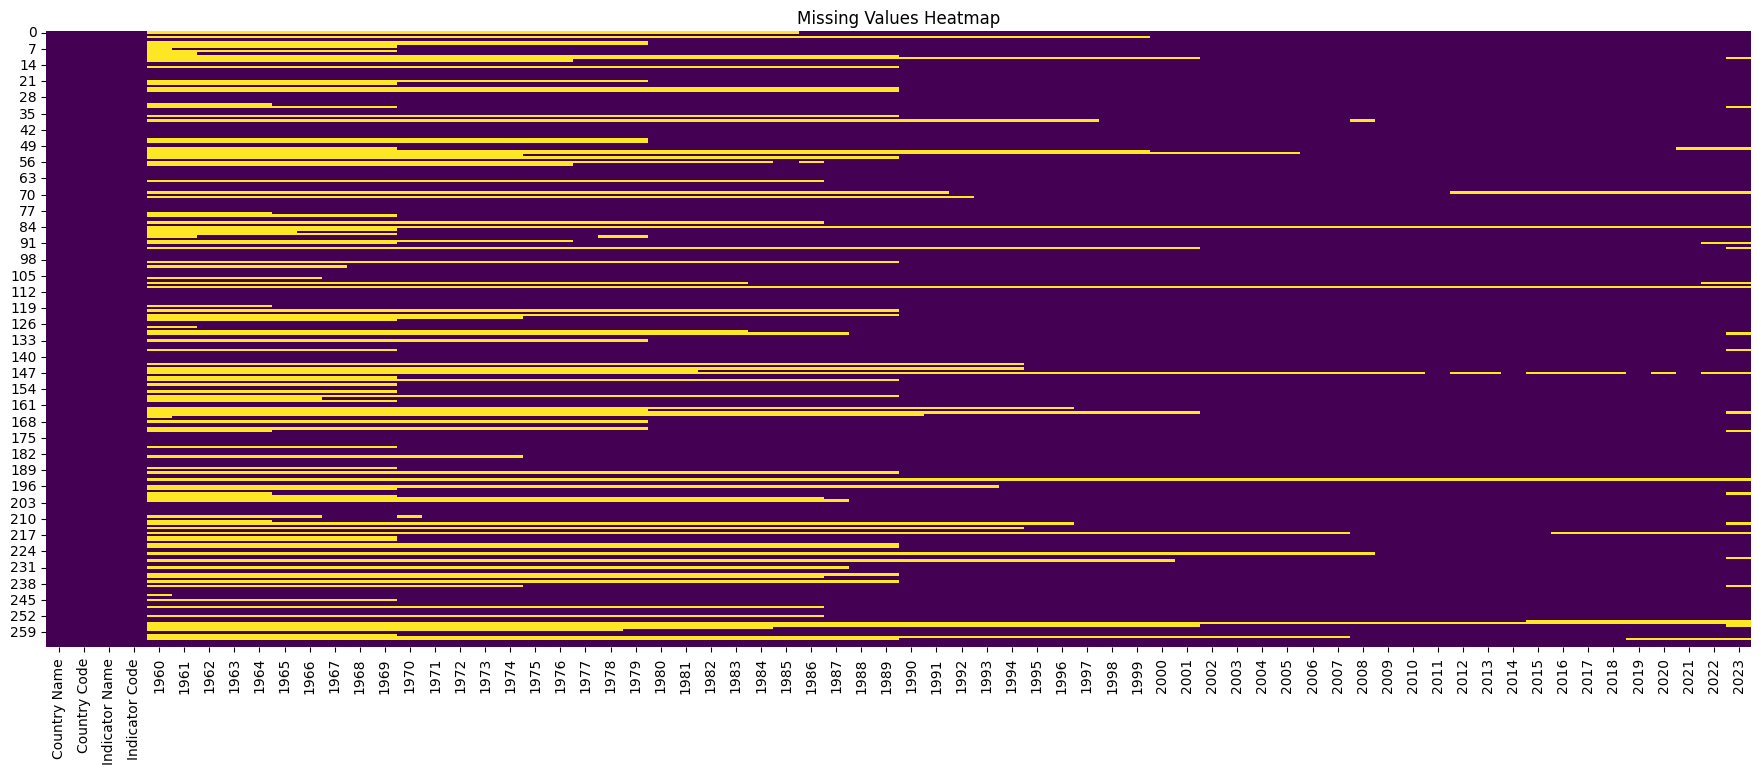

In [593]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df8, years_of_interest, selected_countries, country_column_name)

In [594]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df8.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df8[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df8 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df8 = melted_df8.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df8.columns.name = None  # Remove column name from pivot_table
pivoted_df8.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,GDP (current US$)
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09
5,Afghanistan,AFG,2005,6.203257e+09
6,Afghanistan,AFG,2006,6.971758e+09
7,Afghanistan,AFG,2007,9.747886e+09
8,Afghanistan,AFG,2008,1.010930e+10
9,Afghanistan,AFG,2009,1.241615e+10


In [595]:
df9 = pd.read_csv("Supplemental Data/Net population migration.csv")
df9.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
238,Middle East & North Africa (IDA & IBRD countries),TMN,Net migration,SM.POP.NETM,-47797.0,-96893.0,-55898.0,-83826.0,-61366.0,-76025.0,42759.0,40686.0,40742.0,30020.0,-30635.0,-92356.0,-89608.0,-63039.0,-58765.0,278235.0,121105.0,-31003.0,-25713.0,-26819.0,140673.0,1457455.0,100258.0,191895.0,300446.0,138195.0,344849.0,125497.0,-29027.0,39162.0,202624.0,-189530.0,-403777.0,-1183594.0,-385613.0,-295631.0,-222278.0,-33092.0,154865.0,97827.0,229176.0,110936.0,-755885.0,444255.0,646934.0,683667.0,406083.0,-295941.0,-267513.0,-214792.0,-268029.0,-568502.0,-415972.0,-261493.0,-787683.0,-988291.0,-539409.0,-694024.0,139705.0,4658.0,-79634.0,400568.0,1104680.0,1180663.0
245,Tuvalu,TUV,Net migration,SM.POP.NETM,-79.0,-77.0,-61.0,-52.0,-135.0,-128.0,-121.0,-123.0,-127.0,-65.0,-71.0,-85.0,-102.0,-121.0,197.0,186.0,171.0,149.0,119.0,37.0,0.0,-46.0,-66.0,-87.0,-103.0,-36.0,-56.0,-68.0,-72.0,-71.0,-69.0,-72.0,-104.0,-119.0,-120.0,-125.0,-121.0,-120.0,-122.0,-120.0,-118.0,-117.0,-104.0,-16.0,-10.0,-8.0,-5.0,1.0,10.0,15.0,22.0,28.0,1.0,-160.0,-166.0,-179.0,-200.0,-246.0,-329.0,-343.0,-355.0,-366.0,-320.0,-323.0
228,Turks and Caicos Islands,TCA,Net migration,SM.POP.NETM,-121.0,-133.0,-136.0,-140.0,-140.0,-134.0,-132.0,-128.0,-124.0,-120.0,-89.0,42.0,54.0,61.0,65.0,66.0,66.0,68.0,74.0,64.0,151.0,220.0,210.0,200.0,195.0,187.0,180.0,172.0,173.0,174.0,309.0,412.0,413.0,415.0,417.0,412.0,409.0,407.0,409.0,414.0,442.0,567.0,792.0,797.0,792.0,793.0,797.0,816.0,848.0,855.0,863.0,798.0,1256.0,1333.0,1001.0,1658.0,1309.0,1421.0,1400.0,1359.0,682.0,682.0,193.0,193.0
25,Belarus,BLR,Net migration,SM.POP.NETM,-27382.0,-26780.0,-32996.0,-28653.0,-17837.0,-17979.0,-14544.0,-13409.0,-7511.0,-12833.0,-8643.0,-5818.0,-7966.0,-7357.0,-5157.0,-6302.0,-5350.0,-4925.0,-11143.0,395.0,16616.0,14998.0,3339.0,-2938.0,-3051.0,-784.0,-11499.0,-12462.0,-5424.0,5639.0,-26497.0,-5876.0,29477.0,19652.0,-12570.0,481.0,5205.0,-235.0,13192.0,2028.0,1812.0,-4469.0,-11945.0,-10795.0,-10424.0,-15451.0,-8303.0,-4013.0,-495.0,13610.0,10300.0,5686.0,10903.0,10550.0,14979.0,18088.0,8272.0,3337.0,8615.0,-33954.0,-33954.0,-33954.0,-8000.0,-3034.0


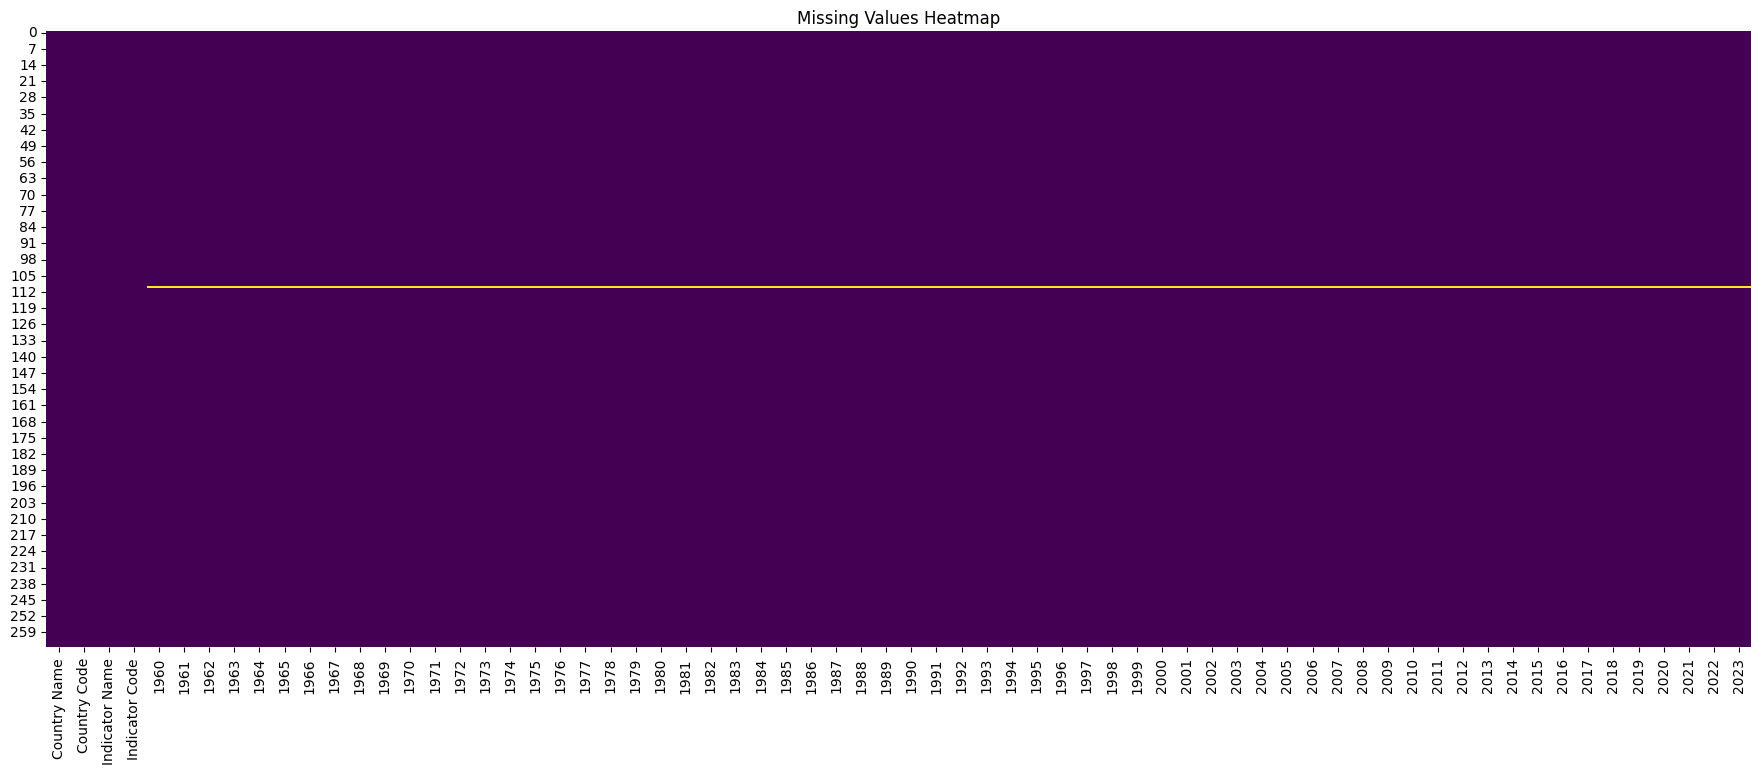

In [596]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df9, years_of_interest, selected_countries, country_column_name)

In [597]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df9.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df9[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df9 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df9 = melted_df9.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df9.columns.name = None  # Remove column name from pivot_table
pivoted_df9.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Net migration
0,Afghanistan,AFG,1960,2606.0
1,Afghanistan,AFG,1961,6109.0
2,Afghanistan,AFG,1962,7016.0
3,Afghanistan,AFG,1963,6681.0
4,Afghanistan,AFG,1964,7079.0
5,Afghanistan,AFG,1965,10695.0
6,Afghanistan,AFG,1966,3563.0
7,Afghanistan,AFG,1967,6824.0
8,Afghanistan,AFG,1968,3333.0
9,Afghanistan,AFG,1969,2029.0


In [598]:
df10 = pd.read_csv("Supplemental Data/Population growth rate.csv")
df10.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
151,Madagascar,MDG,Population growth (annual %),SP.POP.GROW,NaN,2.609525,2.596345,2.585728,2.584822,2.598340,2.631506,2.678884,2.732747,2.786829,2.847209,2.907920,2.948303,2.975339,2.996323,3.011692,3.022532,3.030146,3.037992,3.041078,3.026120,2.986039,2.958911,2.942093,2.918537,2.903709,2.869493,2.850284,2.874575,2.908494,2.951659,2.988924,3.009138,3.050254,3.107198,3.162548,3.217393,3.255055,3.271598,3.246675,3.172973,3.079898,2.989994,2.930671,2.916109,2.929269,2.937691,2.934950,2.935329,2.936041,2.909197,2.839657,2.766263,2.719648,2.680779,2.639484,2.613359,2.603455,2.603345,2.601366,2.567789,2.515374,2.482078,2.462015
62,Early-demographic dividend,EAR,Population growth (annual %),SP.POP.GROW,NaN,2.607828,2.610590,2.604250,2.610478,2.536540,2.470840,2.511584,2.517208,2.495910,2.502933,2.422309,2.418839,2.498966,2.504230,2.506293,2.494767,2.476216,2.441233,2.483991,2.561985,2.647394,2.657454,2.597338,2.566091,2.535028,2.506713,2.480037,2.446791,2.399371,2.485351,2.341260,2.234678,2.141422,2.016933,2.017886,2.093162,2.057404,1.987187,1.928066,1.897400,1.869107,1.783105,1.736863,1.740604,1.695461,1.675148,1.644876,1.604363,1.586251,1.558783,1.562886,1.506316,1.464850,1.389410,1.382949,1.338895,1.268985,1.227369,1.230131,1.223136,1.059316,1.125246,1.164970
52,Cayman Islands,CYM,Population growth (annual %),SP.POP.GROW,NaN,2.031898,2.071182,2.129538,2.161531,2.105114,2.103560,2.162638,2.046677,1.926957,3.404255,5.377192,5.827911,5.571228,5.292406,5.011829,4.717254,4.405462,4.035317,3.891008,4.356058,4.723036,4.611375,4.423377,4.275094,4.165474,4.012395,3.870596,3.734697,3.781300,4.423499,4.860882,4.747382,4.625635,4.488100,4.341114,4.186839,4.018564,3.806435,3.622447,3.566401,3.504438,3.409299,3.285507,3.176577,3.117248,3.039594,2.972063,2.903871,2.827622,2.775743,2.747541,2.714328,2.623843,2.533486,2.433578,2.337731,2.248694,2.155269,2.080094,1.995493,2.052063,2.093246,2.001049
107,IDA only,IDX,Population growth (annual %),SP.POP.GROW,NaN,2.512652,2.543794,2.560609,2.593297,2.626774,2.639352,2.676518,2.709309,2.690238,2.609358,2.421699,2.450163,2.669903,2.684207,2.562334,2.479213,2.426874,2.529905,2.630979,2.395766,2.283306,2.542969,2.696068,2.657310,2.615513,2.585473,2.579798,2.535134,2.525306,2.473116,2.454958,2.645090,2.778501,2.697255,2.646516,2.620858,2.559156,2.511557,2.459251,2.386344,2.354192,2.433164,2.424522,2.339912,2.336268,2.375948,2.344154,2.284554,2.260244,2.251245,2.260777,2.232651,2.070558,2.128033,2.168194,2.251163,2.285793,2.308866,2.351627,2.349458,2.287255,2.228889,2.259036


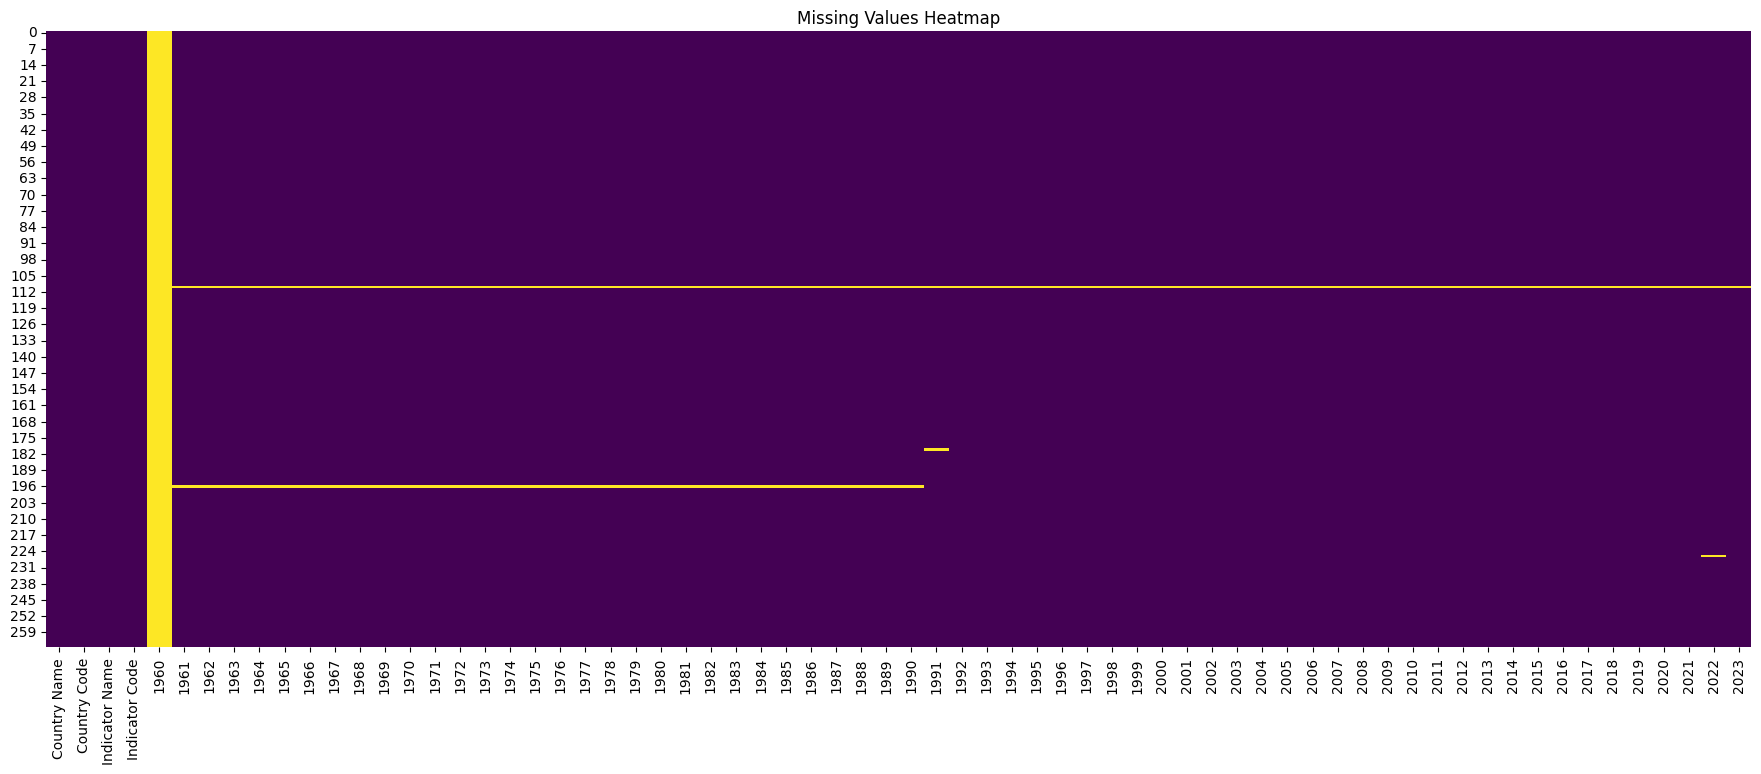

In [599]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df10, years_of_interest, selected_countries, country_column_name)

In [600]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df10.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df10[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df10 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df10 = melted_df10.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df10.columns.name = None  # Remove column name from pivot_table
pivoted_df10.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Population growth (annual %)
0,Afghanistan,AFG,1961,1.962239
1,Afghanistan,AFG,1962,2.044523
2,Afghanistan,AFG,1963,2.105208
3,Afghanistan,AFG,1964,2.161195
4,Afghanistan,AFG,1965,2.233709
5,Afghanistan,AFG,1966,2.269651
6,Afghanistan,AFG,1967,2.306668
7,Afghanistan,AFG,1968,2.360683
8,Afghanistan,AFG,1969,2.392720
9,Afghanistan,AFG,1970,2.445206


In [601]:
df11 = pd.read_csv("Supplemental Data/Population proportion age 15-64.csv")
df11.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
201,Romania,ROU,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,65.013860,65.043870,65.180058,65.430476,65.803907,66.274666,66.750360,66.818569,66.540165,66.336313,66.244122,66.215289,66.107065,65.881796,65.507105,65.018076,64.461601,63.861019,63.344558,62.912981,62.589304,62.423607,62.961978,64.211245,65.145278,65.597656,65.820908,65.877605,65.893495,65.950429,66.129825,66.423098,66.751589,67.026844,67.261781,67.477054,67.669397,67.760288,67.710053,67.728660,67.887340,68.113511,68.398350,68.681754,68.931603,69.097276,69.112083,69.029321,68.884373,68.654986,68.412922,68.173304,67.987473,67.844338,67.546562,67.133350,66.715292,66.263401,65.800468,65.351645,64.884750,64.575026,64.468874,64.370389
231,Europe & Central Asia (IDA & IBRD countries),TEC,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,62.004820,61.552969,61.407440,61.382188,61.518737,61.733400,61.952833,62.189851,62.385635,62.618571,62.936560,63.233784,63.470149,63.711949,63.929134,64.113248,64.262436,64.343475,64.404113,64.378257,64.327291,64.413729,64.570465,64.664599,64.681724,64.699554,64.712232,64.696287,64.648129,64.581181,64.527089,64.486253,64.453118,64.454510,64.513205,64.669776,64.909966,65.225780,65.700301,66.282399,66.825859,67.311025,67.710592,68.003051,68.235088,68.459447,68.682779,68.910670,69.181675,69.450141,69.647268,69.680271,69.516606,69.272616,68.933832,68.512433,68.082860,67.656082,67.267431,66.865294,66.476597,66.185876,65.939926,65.708672
80,Gabon,GAB,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,60.807100,60.411642,60.013514,59.582615,59.140139,58.741352,58.361604,57.974136,57.583481,57.257113,56.972990,56.643437,56.277216,55.903394,55.548136,55.212195,54.888523,54.574929,54.267555,53.964184,53.666876,53.375422,53.094632,52.829605,52.588719,52.380574,52.208431,52.070977,51.964430,51.892178,51.861580,51.878057,51.942183,52.053137,52.218306,52.450316,52.749400,53.092266,53.461131,53.850572,54.253365,54.669539,55.102462,55.548579,56.000474,56.454241,56.905718,57.345681,57.759671,58.124884,58.428762,58.680477,58.906529,59.123022,59.299651,59.401163,59.419675,59.374380,59.301660,59.231765,59.188931,59.182332,59.214842,59.295972
217,Sub-Saharan Africa,SSF,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.945952,53.846502,53.733438,53.589156,53.427727,53.268489,53.111695,52.960526,52.815352,52.673618,52.531622,52.384271,52.234543,52.097474,51.985354,51.887331,51.778837,51.674718,51.595729,51.520478,51.458744,51.410871,51.374104,51.361960,51.358928,51.363431,51.377393,51.396470,51.431446,51.481564,51.543715,51.619545,51.676813,51.756068,51.869974,51.938578,51.926315,51.934541,52.048432,52.190594,52.312668,52.423110,52.525116,52.619549,52.704193,52.770958,52.823039,52.875521,52.946067,53.029693,53.123407,53.236111,53.351453,53.475226,53.610507,53.769122,53.946435,54.154772,54.401329,54.656062,54.933973,55.226583,55.516079,55.810932


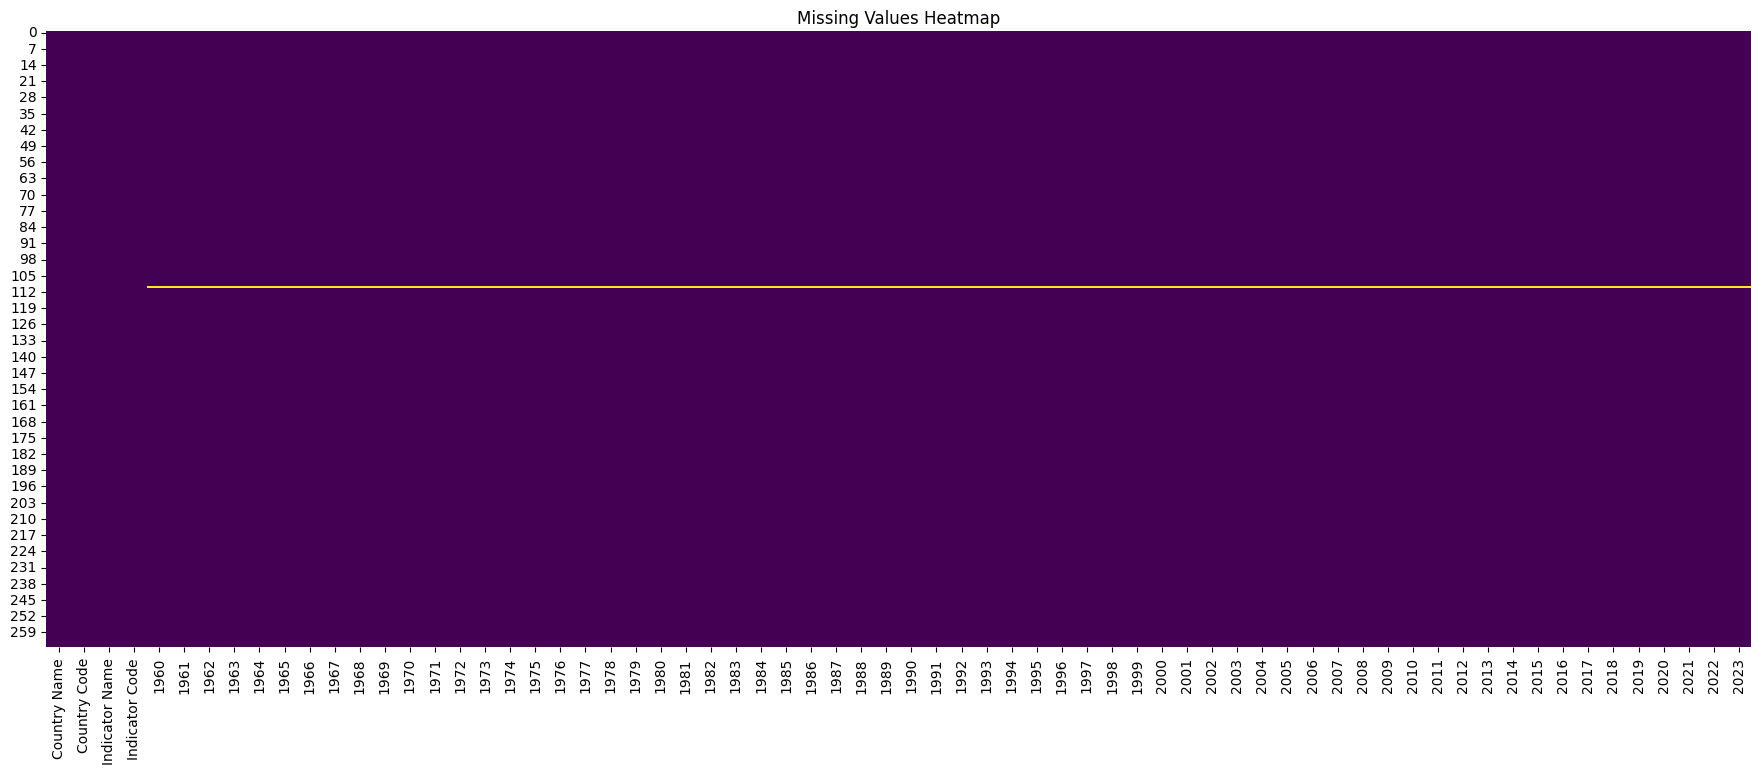

In [602]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df11, years_of_interest, selected_countries, country_column_name)

In [603]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df11.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df11[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df11 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df11 = melted_df11.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df11.columns.name = None  # Remove column name from pivot_table
pivoted_df11.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Population ages 15-64 (% of total population)
0,Afghanistan,AFG,1960,55.229884
1,Afghanistan,AFG,1961,55.162055
2,Afghanistan,AFG,1962,55.094352
3,Afghanistan,AFG,1963,54.988991
4,Afghanistan,AFG,1964,54.832669
5,Afghanistan,AFG,1965,54.616091
6,Afghanistan,AFG,1966,54.362958
7,Afghanistan,AFG,1967,54.114336
8,Afghanistan,AFG,1968,53.870524
9,Afghanistan,AFG,1969,53.631680


In [604]:
df12 = pd.read_csv("Supplemental Data/Profit tax as a percentage of commercial profit.csv")
df12.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
55,Germany,DEU,Profit tax (% of commercial profits),IC.TAX.PRFT.CP.ZS,NaN,NaN,NaN,NaN,21.4,21.6,23.2,22.9,17.6,23.2,19.2,19.3,23.2,23.3,23.2,23.2,23.2,23.2,23.2,NaN,NaN,NaN,NaN
27,Bermuda,BMU,Profit tax (% of commercial profits),IC.TAX.PRFT.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Djibouti,DJI,Profit tax (% of commercial profits),IC.TAX.PRFT.CP.ZS,NaN,NaN,NaN,NaN,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,17.7,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Profit tax (% of commercial profits),IC.TAX.PRFT.CP.ZS,NaN,NaN,NaN,NaN,34.9,34.9,34.9,34.9,34.9,34.8,19.9,20.1,13.8,13.8,13.8,13.8,13.8,13.8,13.8,NaN,NaN,NaN,NaN


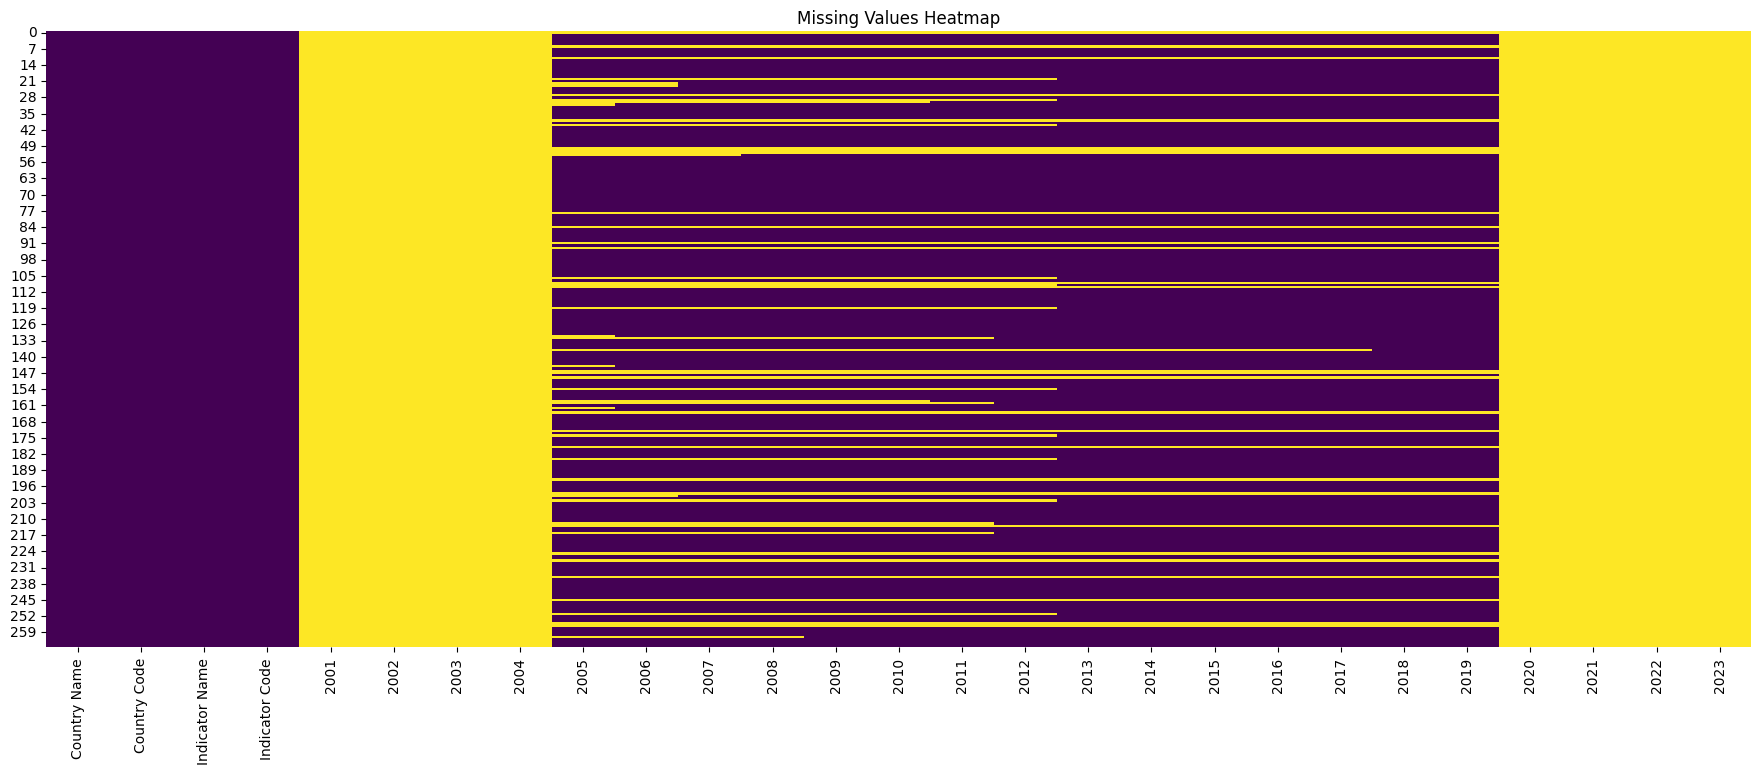

In [605]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df12, years_of_interest, selected_countries, country_column_name)

In [606]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df12.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df12[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df12 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df12 = melted_df12.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df12.columns.name = None  # Remove column name from pivot_table
pivoted_df12.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Profit tax (% of commercial profits)
0,Afghanistan,AFG,2005,0.000000
1,Afghanistan,AFG,2006,0.000000
2,Afghanistan,AFG,2007,0.000000
3,Afghanistan,AFG,2008,0.000000
4,Afghanistan,AFG,2009,0.000000
5,Afghanistan,AFG,2010,0.000000
6,Afghanistan,AFG,2011,0.000000
7,Afghanistan,AFG,2012,0.000000
8,Afghanistan,AFG,2013,0.000000
9,Afghanistan,AFG,2014,0.000000


In [607]:
df13 = pd.read_csv("Supplemental Data/Proportion of urban population.csv")
df13.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
49,Caribbean small states,CSS,Urban population (% of total population),SP.URB.TOTL.IN.ZS,36.405725,36.600836,36.818284,37.050761,37.261514,37.429577,37.601950,37.777637,37.954874,38.127073,38.304450,38.528422,38.954449,39.581326,40.198966,40.809789,41.412148,41.999491,42.571755,43.126084,43.666706,43.790961,43.951347,44.127217,44.321080,44.532811,44.754535,44.973197,45.203224,45.445808,45.661987,45.782302,45.798226,45.803241,45.815369,45.858926,45.918956,45.978264,46.037513,46.095952,46.161429,46.233057,46.242661,46.220838,46.177910,46.102597,46.037304,45.983218,45.930169,45.881073,45.846312,45.863663,45.929390,45.979679,46.039544,46.101781,46.165921,46.237357,46.208884,46.242045,46.386338,46.480802,46.608676,46.770271
226,Seychelles,SYC,Urban population (% of total population),SP.URB.TOTL.IN.ZS,27.673000,28.717000,29.786000,30.877000,31.991000,33.123000,34.277000,35.449000,36.641000,37.846000,39.068000,40.337000,41.802000,43.277000,44.767000,46.266000,47.774000,49.282000,49.396000,49.381000,49.366000,49.352000,49.337000,49.322000,49.307000,49.292000,49.277000,49.262000,49.247000,49.250000,49.270000,49.307000,49.362000,49.435000,49.525000,49.633000,49.758000,49.901000,50.061000,50.238000,50.433000,50.646000,50.876000,51.123000,51.388000,51.670000,51.969000,52.285000,52.619000,52.969000,53.336000,53.720000,54.120000,54.537000,54.969000,55.400000,55.831000,56.261000,56.691000,57.119000,57.546000,57.972000,58.396000,58.820000
235,Turkmenistan,TKM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.412000,46.557000,46.702000,46.848000,46.993000,47.139000,47.284000,47.430000,47.575000,47.721000,47.780000,47.735000,47.691000,47.646000,47.602000,47.557000,47.513000,47.469000,47.424000,47.299000,47.078000,46.858000,46.637000,46.417000,46.196000,45.976000,45.757000,45.537000,45.317000,45.160000,45.075000,44.990000,44.904000,44.819000,44.734000,44.794000,45.018000,45.241000,45.465000,45.689000,45.913000,46.137000,46.362000,46.587000,46.812000,47.052000,47.308000,47.581000,47.868000,48.172000,48.491000,48.825000,49.175000,49.541000,49.921000,50.317000,50.728000,51.153000,51.593000,52.048000,52.516000,52.998000,53.494000,54.003000
107,IDA only,IDX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,11.508662,11.791740,12.093286,12.410677,12.741917,13.084085,13.426709,13.798146,14.181682,14.579924,14.971951,15.383788,15.808941,16.220951,16.631894,16.636435,17.100819,17.582177,18.087437,18.560266,19.087540,19.549461,19.863220,20.211434,20.603414,21.024702,21.451045,21.878958,22.309066,22.715643,23.109799,23.464616,23.799590,24.133990,24.469626,24.789831,25.064293,25.355884,25.665181,25.978191,26.298710,26.667865,27.057921,27.453403,27.851647,28.265465,28.692617,29.092742,29.557313,30.012831,30.479303,30.915863,31.333277,31.751091,32.170643,32.648927,33.150781,33.665732,34.182047,34.701533,35.223657,35.752164,36.300782,36.860293


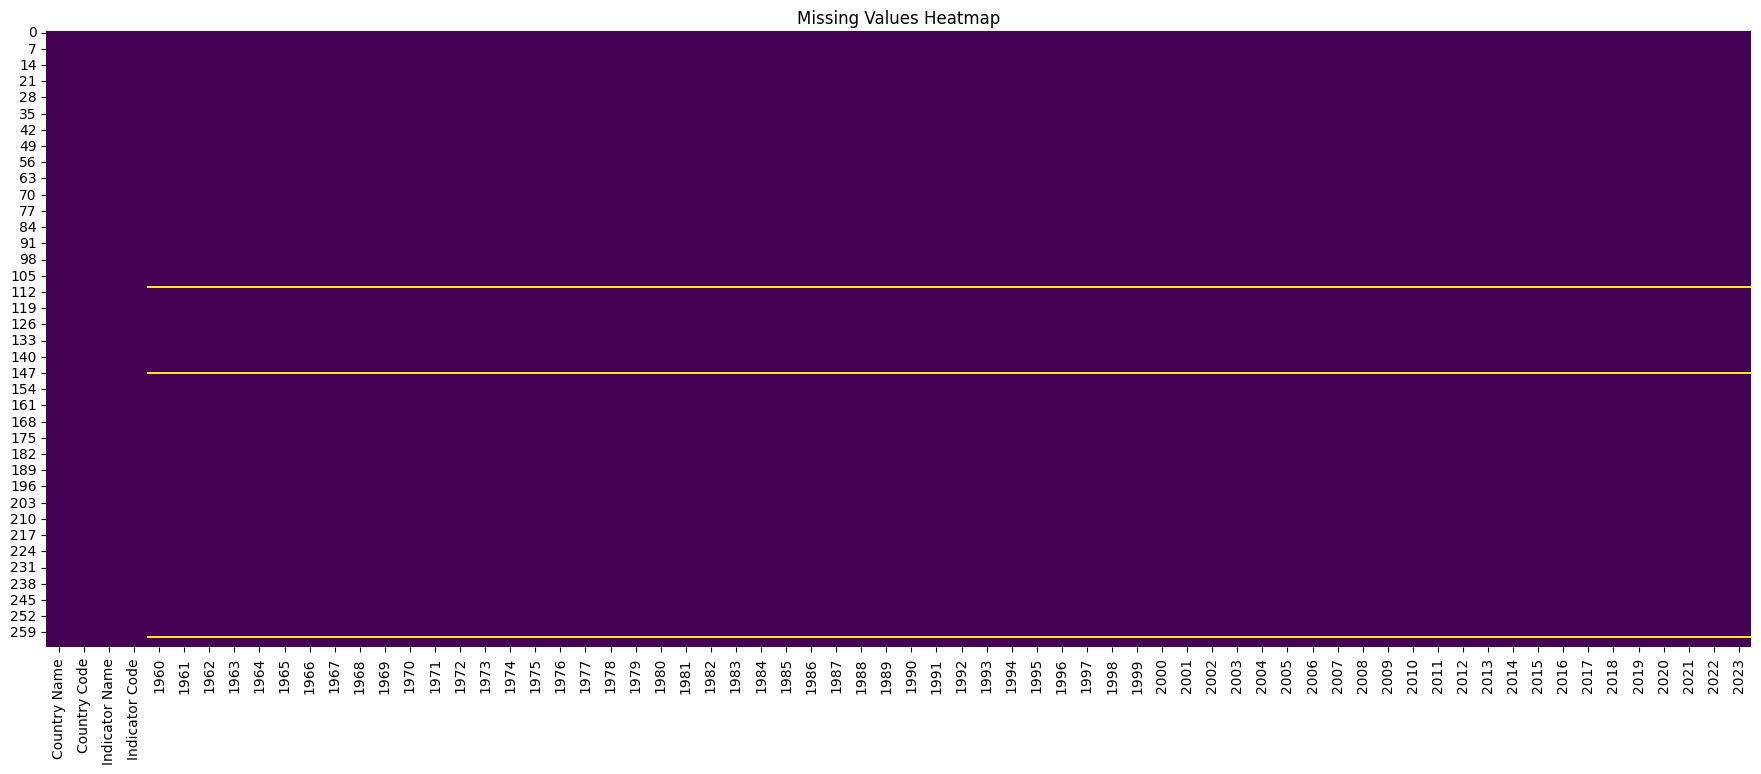

In [608]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df13, years_of_interest, selected_countries, country_column_name)

In [609]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df13.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df13[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df13 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df13 = melted_df13.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df13.columns.name = None  # Remove column name from pivot_table
pivoted_df13.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Urban population (% of total population)
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586
5,Afghanistan,AFG,1965,9.904
6,Afghanistan,AFG,1966,10.233
7,Afghanistan,AFG,1967,10.570
8,Afghanistan,AFG,1968,10.918
9,Afghanistan,AFG,1969,11.275


In [610]:
df14 = pd.read_csv("Supplemental Data/Public social spending as a percentage of GDP.csv")
df14.sample(4)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME_PERIOD,Time,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
1149,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,SVN,Slovenia,SOCEXP,Social spending,PUB,Public,PC_GDP,% of GDP,A,Annual,2010,NaN,23.355,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,BEL,Belgium,SOCEXP,Social spending,PUB,Public,PC_GDP,% of GDP,A,Annual,2020,NaN,32.280,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,ISR,Israel,SOCEXP,Social spending,PUB,Public,PC_GDP,% of GDP,A,Annual,1996,NaN,16.519,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,SWE,Sweden,SOCEXP,Social spending,PUB,Public,PC_GDP,% of GDP,A,Annual,1998,NaN,28.172,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [611]:
df14['Country Name'] = df14['Country']

In [612]:
df14['Year'] = df14['TIME_PERIOD']

In [613]:
df14['Indicator Name'] = df14[['Subject', 'Indicator', 'Measure']].fillna('').agg(' '.join, axis=1)


In [614]:
df14 = df14[['Year', 'Indicator Name', 'Country Name', 'OBS_VALUE']]

In [615]:
df14

,Year,Indicator Name,Country Name,OBS_VALUE
0,1980,Public Social spending % of GDP,Australia,10.244
1,1981,Public Social spending % of GDP,Australia,10.116
2,1982,Public Social spending % of GDP,Australia,11.090
3,1983,Public Social spending % of GDP,Australia,11.591
4,1984,Public Social spending % of GDP,Australia,11.970
...,...,...,...,...
1410,2017,Public Social spending % of GDP,United States,18.474
1411,2018,Public Social spending % of GDP,United States,18.235
1412,2019,Public Social spending % of GDP,United States,18.262
1413,2020,Public Social spending % of GDP,United States,23.942


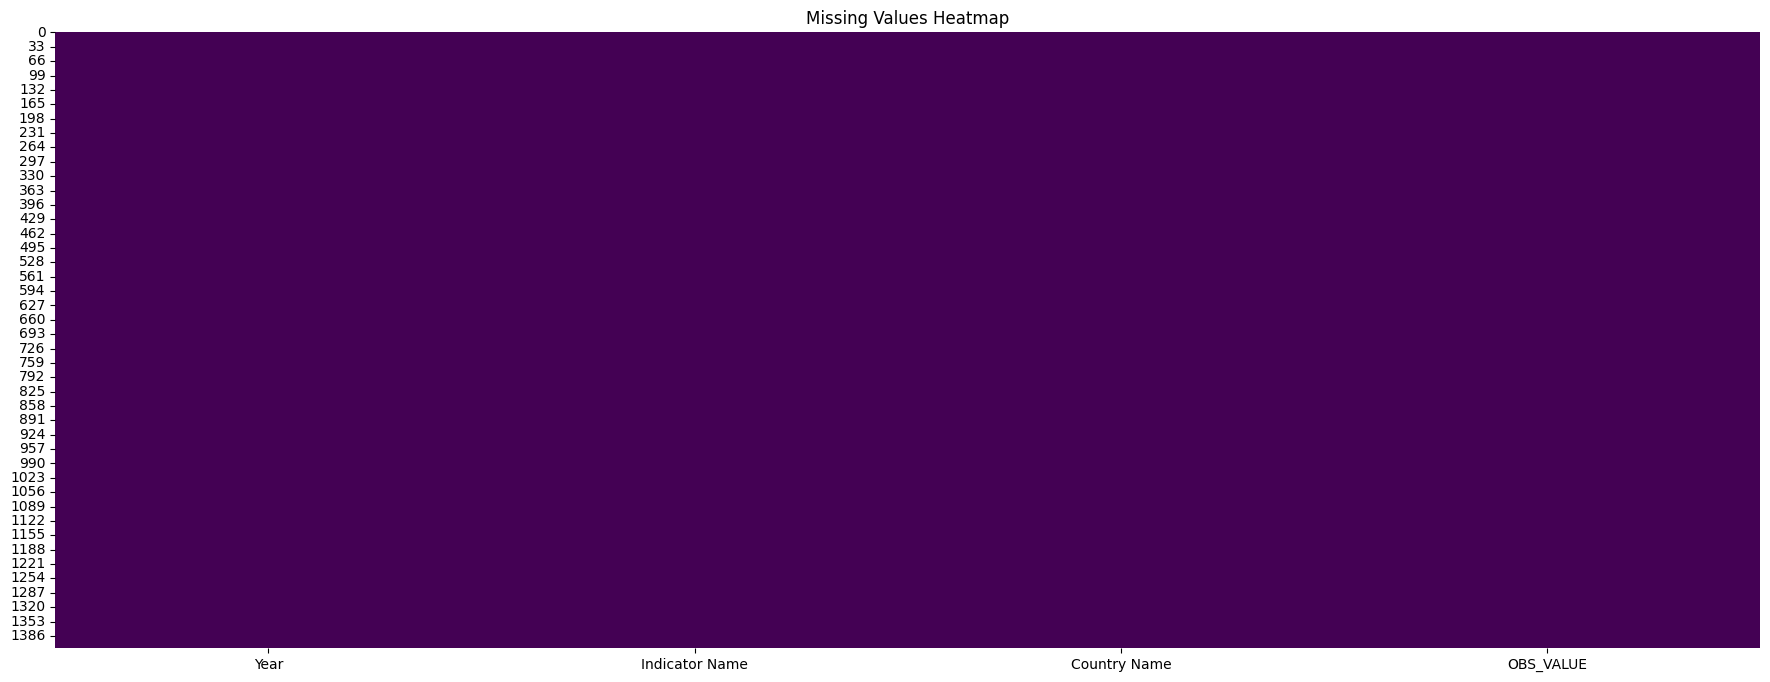

In [616]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df14, years_of_interest, selected_countries, country_column_name)

In [617]:
df_czech = df14[df14["Country Name"] == "Korea, Rep."]
df_czech

,Year,Indicator Name,Country Name,OBS_VALUE


In [618]:
from thefuzz import fuzz, process  

# Define the target country
target_country = "Turkiye"

# Get matches with at least 80% similarity
matches = [country for country in df14["Country Name"].unique() if fuzz.ratio(target_country, country) >= 60]

# Filter the DataFrame based on these matches
df_czech_fuzzy = df14[df14["Country Name"].isin(matches)]

# Display results
print(matches)
df_czech_fuzzy


['Türkiye']


,Year,Indicator Name,Country Name,OBS_VALUE
1291,1980,Public Social spending % of GDP,Türkiye,2.245
1292,1981,Public Social spending % of GDP,Türkiye,1.647
1293,1982,Public Social spending % of GDP,Türkiye,1.784
1294,1983,Public Social spending % of GDP,Türkiye,1.844
1295,1984,Public Social spending % of GDP,Türkiye,2.219
1296,1985,Public Social spending % of GDP,Türkiye,1.949
1297,1986,Public Social spending % of GDP,Türkiye,2.094
1298,1987,Public Social spending % of GDP,Türkiye,2.186
1299,1988,Public Social spending % of GDP,Türkiye,2.553
1300,1989,Public Social spending % of GDP,Türkiye,3.084


In [619]:
df14['Country Name'] = df14['Country Name'].replace("Korea", "Korea, Rep.")

In [620]:
df14['Country Name'] = df14['Country Name'].replace("Türkiye", "Turkiye")

In [621]:
df14

,Year,Indicator Name,Country Name,OBS_VALUE
0,1980,Public Social spending % of GDP,Australia,10.244
1,1981,Public Social spending % of GDP,Australia,10.116
2,1982,Public Social spending % of GDP,Australia,11.090
3,1983,Public Social spending % of GDP,Australia,11.591
4,1984,Public Social spending % of GDP,Australia,11.970
...,...,...,...,...
1410,2017,Public Social spending % of GDP,United States,18.474
1411,2018,Public Social spending % of GDP,United States,18.235
1412,2019,Public Social spending % of GDP,United States,18.262
1413,2020,Public Social spending % of GDP,United States,23.942


In [622]:
# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df14 = df14.pivot_table(
    index=["Country Name", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="OBS_VALUE",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()
pivoted_df14

Indicator Name,Country Name,Year,Public Social spending % of GDP
0,Australia,1980,10.244
1,Australia,1981,10.116
2,Australia,1982,11.090
3,Australia,1983,11.591
4,Australia,1984,11.970
...,...,...,...
1410,United States,2017,18.474
1411,United States,2018,18.235
1412,United States,2019,18.262
1413,United States,2020,23.942


In [623]:
df15 = pd.read_csv("Supplemental Data/Real interest rate.csv")
df15.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
227,Syrian Arab Republic,SYR,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Latvia,LVA,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Liechtenstein,LIE,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Djibouti,DJI,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [624]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df15.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df15[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df15 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df15 = melted_df15.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df15.columns.name = None  # Remove column name from pivot_table
pivoted_df15.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Real interest rate (%)
0,Afghanistan,AFG,2006,10.046897
1,Afghanistan,AFG,2007,-3.585111
2,Afghanistan,AFG,2008,12.557960
3,Afghanistan,AFG,2009,17.542929
4,Afghanistan,AFG,2010,11.364094
5,Afghanistan,AFG,2011,-1.241506
6,Afghanistan,AFG,2012,7.174387
7,Afghanistan,AFG,2013,9.784496
8,Afghanistan,AFG,2014,14.351689
9,Afghanistan,AFG,2015,12.252548


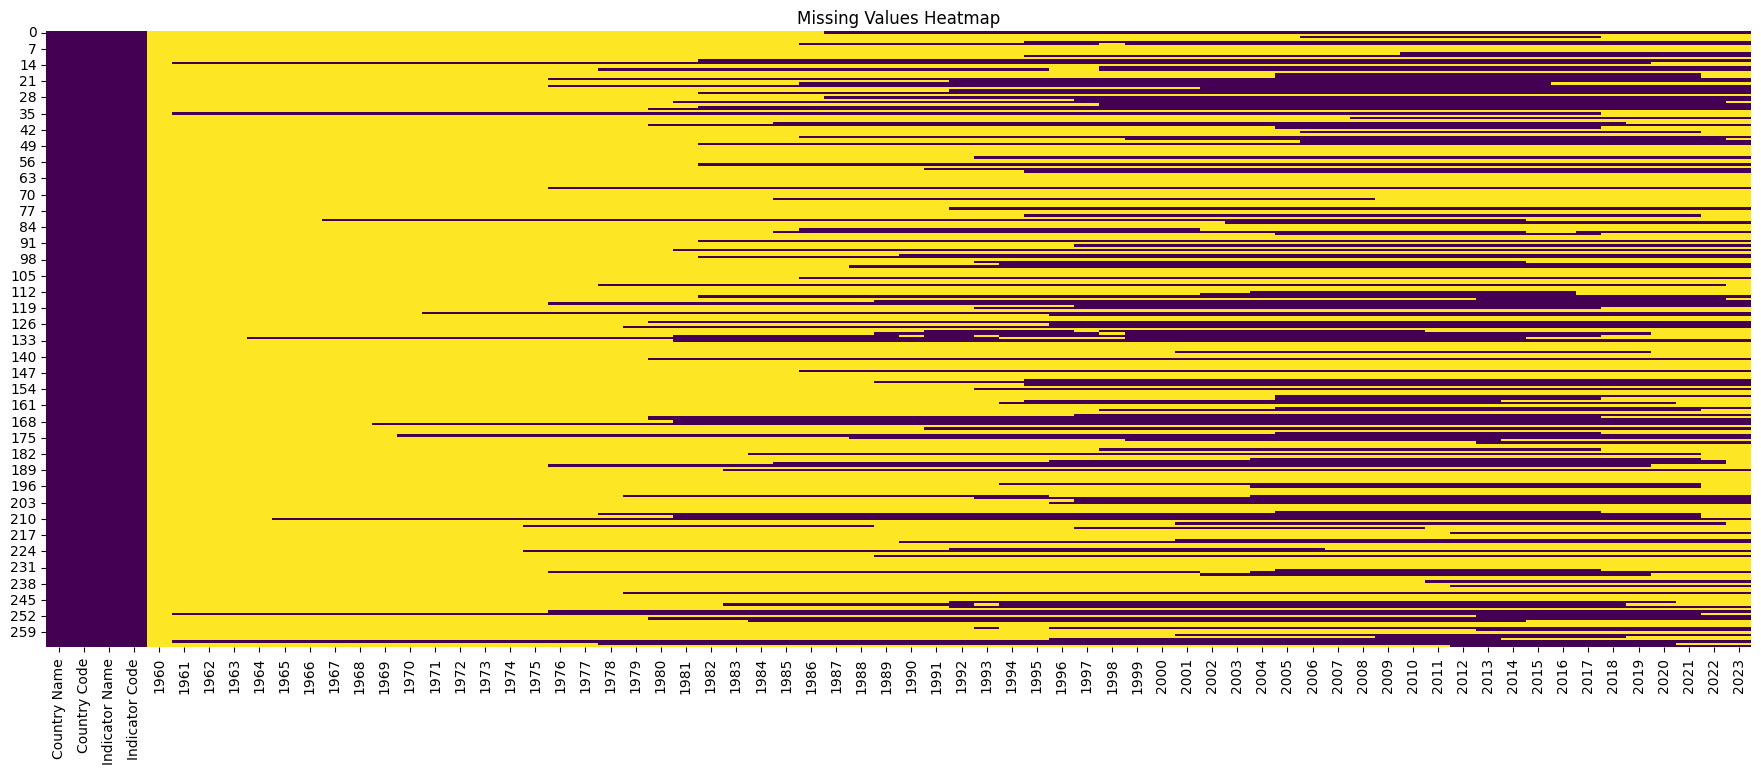

In [625]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df15, years_of_interest, selected_countries, country_column_name)

In [626]:
df16 = pd.read_csv("Supplemental Data/Tax revenue as a percentage of GDP.csv")
df16.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
64,Europe & Central Asia (excluding high income),ECA,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.893988,16.658785,13.484543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.045366,17.800744,17.751246,17.755099,16.900863,17.402759,16.998108,16.942571,16.912810,16.460481,16.539104,15.970356,16.232748,16.373248,15.543045,NaN
145,Latvia,LVA,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.331493,19.967075,19.221818,22.875990,24.315969,23.317081,21.242465,21.093278,20.627464,21.152687,21.225496,22.355129,23.351948,22.809455,21.724086,19.193836,20.066441,21.295808,21.894789,22.534136,22.856365,23.169027,24.341610,24.352470,23.637626,22.065186,22.562227,22.871633,24.230259,NaN
115,Israel,ISR,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.440314,23.143511,29.167013,28.959946,32.176089,33.471172,31.627469,35.978332,34.188697,32.755379,37.146404,37.128865,35.664536,33.503358,32.580970,29.990649,28.319376,26.558693,25.586300,19.174444,25.405676,25.746285,26.200409,25.772824,25.219569,25.610749,24.751159,24.712466,26.349157,25.906416,24.905062,24.135849,24.055263,24.562396,25.305988,25.298379,23.279776,21.341321,22.034131,22.251750,21.659762,22.565730,22.872255,23.119802,23.124383,24.310828,22.788887,22.271017,21.987197,24.555996,25.011307,NaN
77,France,FRA,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.848770,17.986141,19.036801,17.923062,19.035848,18.399688,18.438578,19.009242,19.479670,19.570010,19.828214,19.673068,19.778000,19.863964,19.827446,20.039090,19.364872,19.063490,18.906004,19.073229,18.623536,18.502017,19.196488,19.534893,20.472284,21.151703,23.122404,23.731174,23.472341,23.498650,22.702978,22.230731,22.266334,22.344287,22.603862,22.161734,22.031561,20.707649,21.944014,21.776538,22.536321,23.176294,23.118742,23.166423,23.088698,23.686679,24.252357,24.569375,24.654612,23.906122,24.468609,NaN


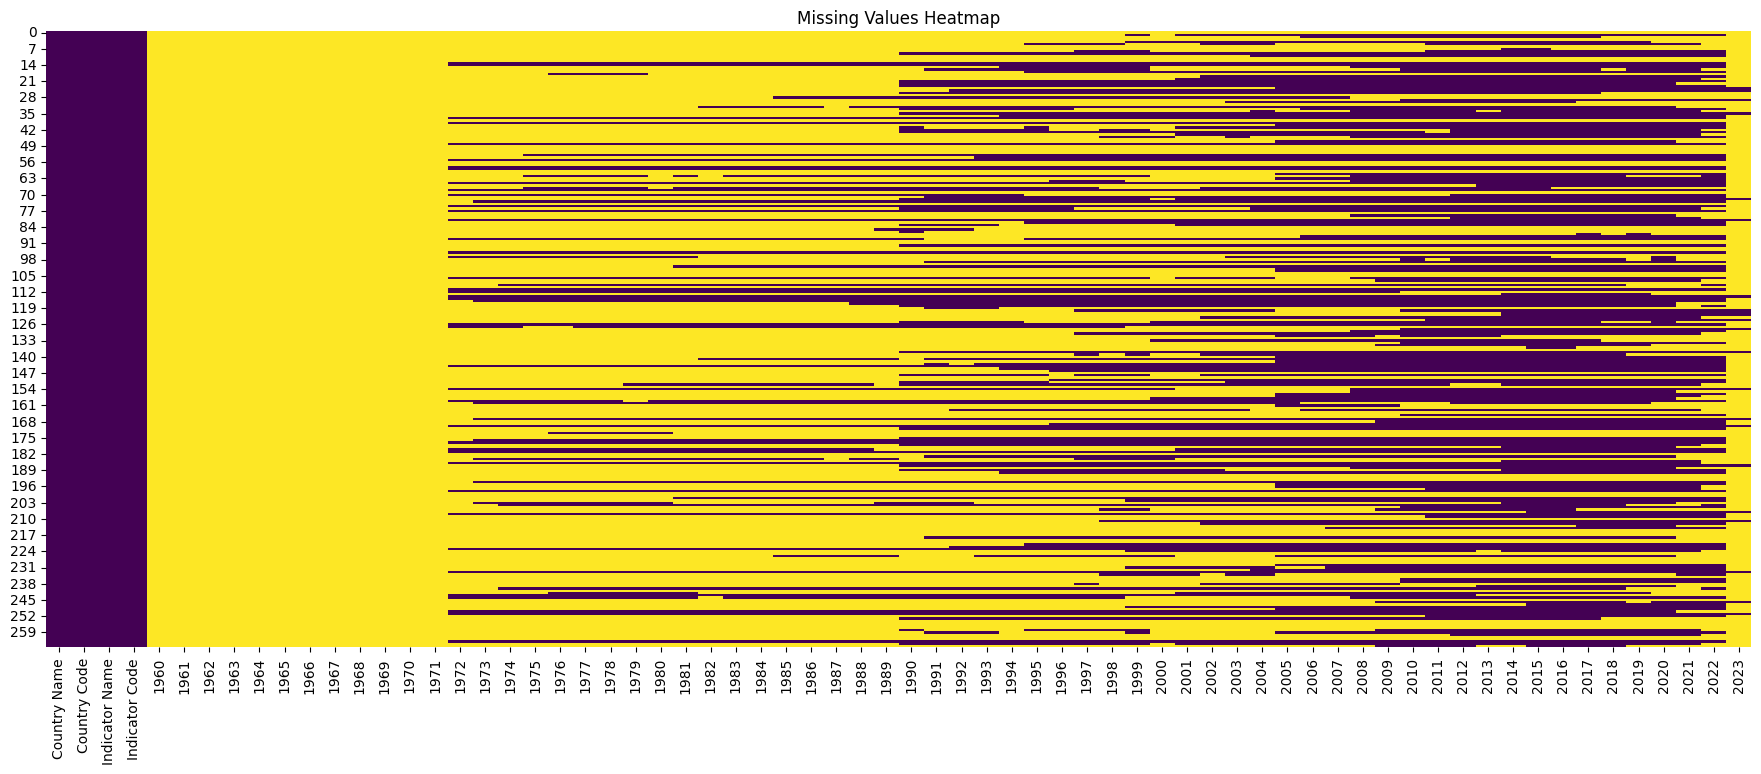

In [627]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df16, years_of_interest, selected_countries, country_column_name)

In [628]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df16.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df16[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df16 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df16 = melted_df16.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df16.columns.name = None  # Remove column name from pivot_table
pivoted_df16.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,Tax revenue (% of GDP)
0,Afghanistan,AFG,2006,6.967598
1,Afghanistan,AFG,2007,5.283457
2,Afghanistan,AFG,2008,6.087965
3,Afghanistan,AFG,2009,8.481758
4,Afghanistan,AFG,2010,9.169752
5,Afghanistan,AFG,2011,8.916794
6,Afghanistan,AFG,2012,7.707801
7,Afghanistan,AFG,2013,7.122773
8,Afghanistan,AFG,2014,6.882103
9,Afghanistan,AFG,2015,7.585382


In [629]:
df17 = pd.read_csv("Supplemental Data/Total labor force.csv")
df17.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
149,Monaco,MCO,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Switzerland,CHE,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,3651864.0,3679323.0,3723947.0,3695173.0,3720840.0,3930532.0,3933401.0,3984380.0,3997298.0,3998554.0,4063514.0,4104236.0,4152691.0,4156791.0,4177415.0,4239677.0,4307745.0,4410883.0,4477541.0,4448155.0,4533301.0,4591067.0,4648917.0,4733518.0,4805778.0,4887467.0,4920909.0,4956756.0,4971449.0,4980273.0,4980721.0,4967575.0,5012392.0
235,Turkmenistan,TKM,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,1159014.0,1214126.0,1245843.0,1313671.0,1361855.0,1385216.0,1450447.0,1479712.0,1496201.0,1538083.0,1583625.0,1638526.0,1686708.0,1731008.0,1758745.0,1790622.0,1822844.0,1849649.0,1892436.0,1930467.0,1960324.0,1995908.0,2032220.0,2067412.0,2106202.0,2143897.0,2179527.0,2213607.0,2246116.0,2221673.0,2241277.0,2360922.0,2418622.0
74,Fragile and conflict affected situations,FCS,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,186642671.0,191228125.0,195926225.0,201279849.0,206931698.0,211599302.0,216097649.0,221156731.0,226500919.0,231655535.0,236813195.0,242274318.0,247925739.0,253791845.0,259733875.0,265483276.0,271386924.0,277236361.0,283283881.0,289613743.0,296457227.0,302045951.0,308710802.0,315612419.0,322000747.0,329167024.0,336192628.0,343781258.0,350272082.0,353723320.0,362326053.0,353417200.0,363159623.0


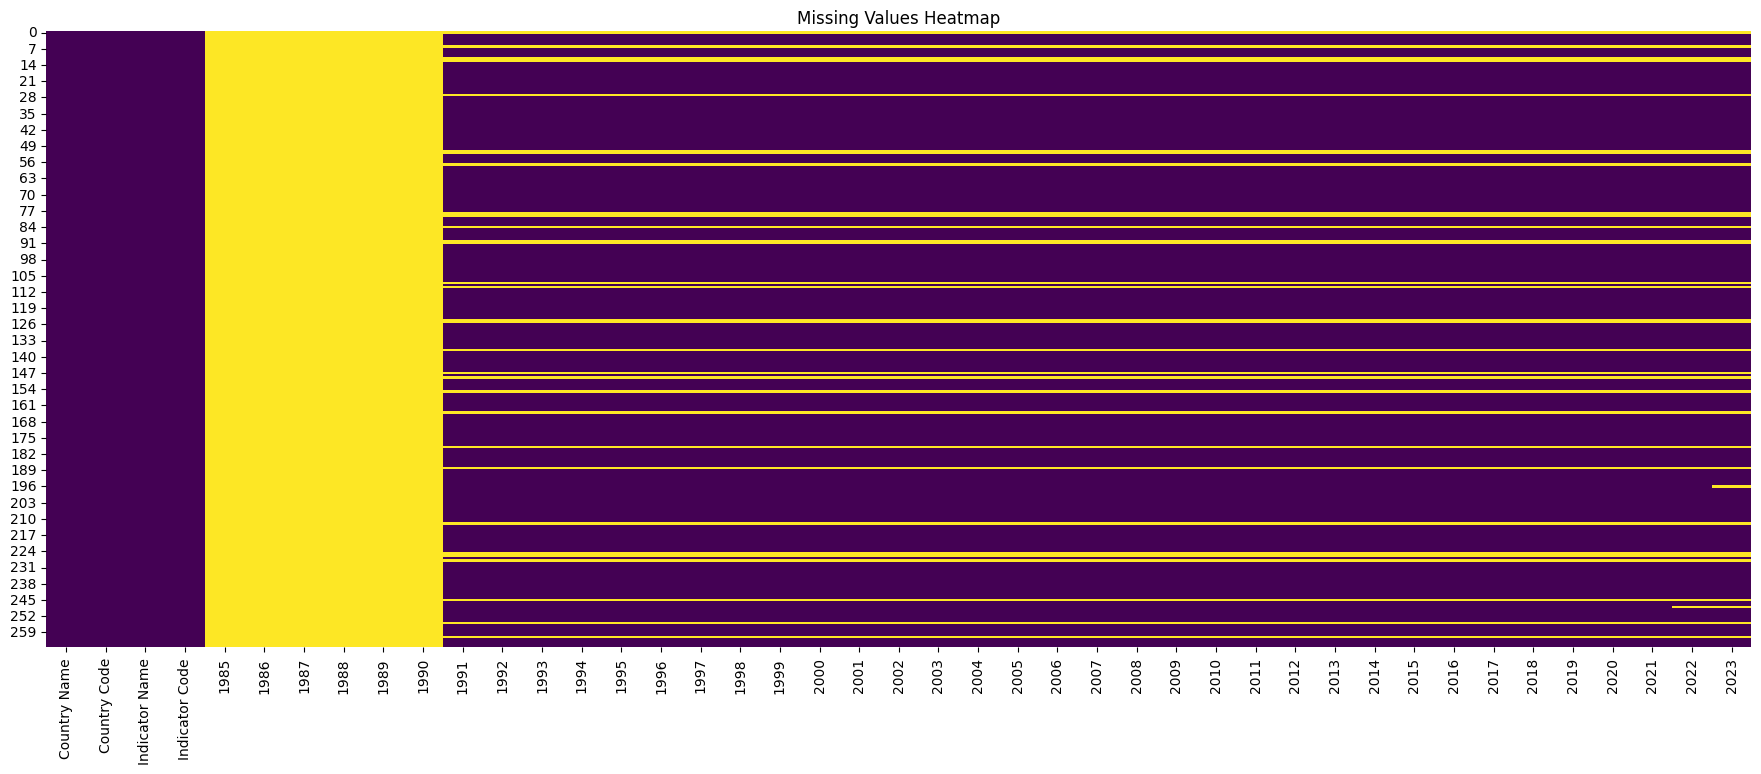

In [630]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df17, years_of_interest, selected_countries, country_column_name)

In [631]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df17.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df17[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df17 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df17 = melted_df17.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df17.columns.name = None  # Remove column name from pivot_table
pivoted_df17.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,"Labor force, total"
0,Afghanistan,AFG,1991,2999548.0
1,Afghanistan,AFG,1992,3241087.0
2,Afghanistan,AFG,1993,3629880.0
3,Afghanistan,AFG,1994,3925360.0
4,Afghanistan,AFG,1995,4097722.0
5,Afghanistan,AFG,1996,4237395.0
6,Afghanistan,AFG,1997,4373437.0
7,Afghanistan,AFG,1998,4514337.0
8,Afghanistan,AFG,1999,4661969.0
9,Afghanistan,AFG,2000,4699899.0


In [632]:
df18 = pd.read_csv("Supplemental Data/Unemployment rate.csv")
df18.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
154,Mexico,MEX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,3.145,3.235,3.365,4.436,7.095,5.465,4.235,3.733,2.598,2.646,2.627,3.003,3.455,3.937,3.558,3.566,3.628,3.874,5.356,5.303,5.175,4.892,4.921,4.819,4.311,3.853,3.419,3.275,3.477,4.441,4.019,3.256,2.812
69,Eritrea,ERI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,5.329,5.483,5.554,5.598,5.464,5.394,5.494,5.589,5.683,5.724,5.784,5.814,5.784,5.674,5.689,5.683,5.696,5.647,5.722,5.839,5.755,5.649,5.610,5.652,5.793,5.830,5.879,5.758,5.789,6.307,6.341,5.941,5.866
78,Faroe Islands,FRO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,4.796,4.933,4.993,4.960,5.573,6.161,6.930,6.385,6.000,5.682,5.314,5.007,4.736,4.390,4.626,4.763,4.997,5.374,5.469,5.456,5.368,5.057,4.944,4.774,5.383,5.893,6.347,6.792,7.373,8.621,9.540,10.087,8.759


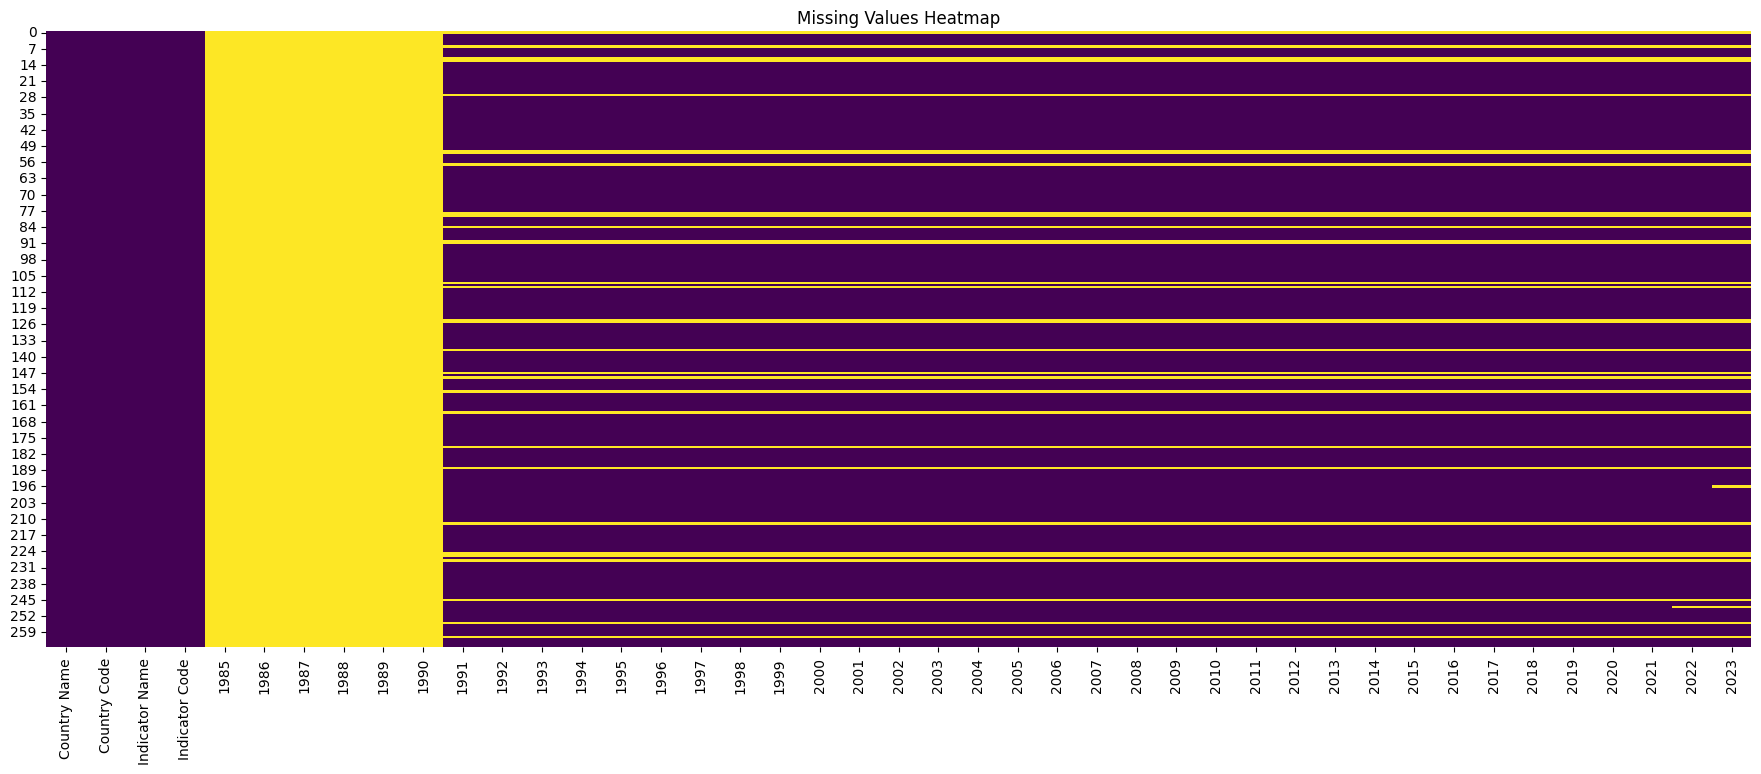

In [633]:
country_column_name = 'Country Name'  # Specify your country column name here
missing_percentages = calculate_missing_data(df18, years_of_interest, selected_countries, country_column_name)

In [634]:
# Step 1: Filter out unnecessary columns (keep only the relevant ones)
# Assuming your DataFrame has year columns from 1950 to 2024
year_columns = [str(year) for year in range(1950, 2025)]  # Adjust if necessary

# Filter the columns in the DataFrame to include only those that exist
existing_year_columns = [col for col in year_columns if col in df18.columns]

# Include the columns that are always present in the dataset
columns_to_keep = ["Country Name", "Country Code", "Indicator Name"] + existing_year_columns

# Create a filtered DataFrame that only includes the columns to keep
df_filtered = df18[columns_to_keep]

# Step 2: Melt the DataFrame, making sure to include all the years that are available
melted_df18 = df_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name"],  # These are the identifiers
    var_name="Year",  # The year columns will be melted into 'Year'
    value_name="Value"  # Values for each year will be stored in 'Value'
)

# Step 3: Pivot so that each Indicator Name becomes its own column
pivoted_df18 = melted_df18.pivot_table(
    index=["Country Name", "Country Code", "Year"],  # Keep these as index
    columns="Indicator Name",  # Unique indicator names become columns
    values="Value",  # Values from the melted table
    aggfunc="first"  # In case of duplicates, take the first value
).reset_index()

# Rename the columns to remove the multi-index created by pivot_table
pivoted_df18.columns.name = None  # Remove column name from pivot_table
pivoted_df18.head(40)  # Show a sample of the transformed dataset

,Country Name,Country Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.946000
1,Afghanistan,AFG,1992,7.940000
2,Afghanistan,AFG,1993,7.961000
3,Afghanistan,AFG,1994,7.980000
4,Afghanistan,AFG,1995,7.967000
5,Afghanistan,AFG,1996,7.941000
6,Afghanistan,AFG,1997,7.920000
7,Afghanistan,AFG,1998,7.941000
8,Afghanistan,AFG,1999,7.953000
9,Afghanistan,AFG,2000,7.955000


# MERGE

In [635]:
pivoted_df18 pivoted_df17

SyntaxError: invalid syntax (2153732322.py, line 1)

In [655]:
from functools import reduce

# List of all pivoted dataframes to merge
dfs = [pivoted_df, pivoted_df1, pivoted_df2, pivoted_df3, pivoted_df4, df5_final, pivoted_df6, 
       pivoted_df7, pivoted_df8, pivoted_df9, pivoted_df10, pivoted_df11, pivoted_df12, pivoted_df13, 
       pivoted_df14, pivoted_df15, pivoted_df16, pivoted_df17]

# Ensure "Year" is of type str in all dataframes
for i in range(len(dfs)):
    dfs[i]["Year"] = dfs[i]["Year"].astype(str)

# Merge all dataframes on 'Year' and 'Country Name'
merged_df = reduce(lambda left, right: left.merge(right, on=['Year', 'Country Name'], how='outer', suffixes=('', '_dup')), dfs)

# Identify and drop duplicate "Country Code" columns (keeping only one occurrence)
country_code_columns = [col for col in merged_df.columns if "Country Code" in col]

if len(country_code_columns) > 1:
    # Keep only the first "Country Code" column and drop the rest
    columns_to_keep = set(merged_df.columns) - set(country_code_columns[1:])
    merged_df = merged_df[list(columns_to_keep)]

# Drop any duplicate columns created during merging (those with "_dup" suffix)
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_dup')]

# Display the first few rows of the final merged dataframe
merged_df.head()


C:\Users\lukep\AppData\Local\Temp\ipykernel_6060\2764883966.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["Year"] = dfs[i]["Year"].astype(str)


,Real interest rate (%),Population ages 15-64 (% of total population),GDP (current US$),Total function in mill,Net migration,"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)",Public Social spending % of GDP,"Foreign direct investment, net inflows (BoP, current US$)",Urban population (% of total population),Country Name,"Labor force, total",Imports of goods and services (% of GDP),Country Code,Tax revenue (% of GDP),Central Government Debt (Percent of GDP),"Current account balance (BoP, current US$)","Inflation, consumer prices (annual %)",Profit tax (% of commercial profits),Year,Exports of goods and services (% of GDP),Population growth (annual %),"Mining, manufacturing and construction/Total function",Housing and community amenities/Total function
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,NaN,NaN,NaN,NaN,20.500000,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,NaN,NaN,NaN,NaN,109.597911,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,NaN,NaN,NaN,NaN,20.926788,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,NaN,NaN,NaN,NaN,64.992097,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil,NaN,NaN,NaN,NaN,8.967857,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN


## Select only the OECD countries

In [ ]:
import pandas as pd

# List of countries to select
selected_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Italy", "Japan", "Korea (South Korea)", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland",
    "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey",
    "United Kingdom", "United States"
]

# Filter the DataFrame
df_filtered = df[df["Central Government Debt (Percent of GDP)"].isin(selected_countries)]

# Display the filtered DataFrame
df_filtered


,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
8,Australia,109.597911,86.92674,85.900679,79.711206,76.698698,74.836091,71.679948,67.593329,65.922542,62.268296,48.243287,49.283013,50.233826,47.49588,44.924837,43.654798,42.399416,40.456414,39.418203,36.7299,34.896253,32.227683,30.662576,27.30877,22.323318,23.591324,22.938086,23.593384,24.685257,22.847326,21.204616,19.098118,16.809215,20.960719,22.27371,23.988655,25.473051,25.207981,20.484311,15.990789,12.073529,11.910551,14.273681,17.690787,19.893666,22.118423,21.379758,20.516577,16.278476,15.4379,13.692619,11.980421,10.310543,8.973068,8.077889,7.343553,6.548537,6.067627,7.599199,11.484176,14.23113,16.983877,19.234095,21.244425,24.592746,28.452028,31.62437,32.377927,32.915406,36.581446,43.628057,41.005104,35.689143,34.832823
9,Austria,20.926788,14.439416,12.841726,15.711377,13.668105,11.378486,10.454996,7.946613,10.918443,12.995015,13.128938,11.847561,11.480847,11.594311,11.543159,10.992227,10.448453,11.601728,12.440101,12.472418,11.991962,10.591754,9.863287,9.826597,9.42492,14.515834,17.520469,19.485273,22.331153,23.724794,24.981424,26.530187,28.591065,32.690184,35.14932,37.312948,41.662678,45.372889,45.361075,45.444269,45.53072,46.221934,46.282719,50.044149,52.726308,55.248115,55.611677,56.834379,56.839792,57.872775,56.508138,55.056343,54.668594,54.721225,55.931896,55.624914,54.238897,51.896978,55.13683,58.572628,59.740463,59.06453,59.48475,59.875237,58.896382,57.836409,58.094618,57.190538,54.936213,52.566907,62.47811,62.571578,60.584699,58.948238
16,Belgium,64.992097,65.546483,69.455962,62.658464,63.318101,65.514567,62.899825,59.857105,60.801029,65.362322,66.431314,64.92774,63.172929,61.777986,59.764851,56.484329,53.36491,52.063454,52.625659,52.025649,48.299721,44.790394,45.090083,43.069606,40.781742,39.426552,40.2353,41.032486,43.953924,47.330026,52.432369,62.071758,72.554808,82.429375,87.842949,95.032381,100.071251,104.174808,105.629633,103.781142,104.236285,106.790223,108.968661,115.495246,112.698699,116.609809,114.050232,111.369193,106.866875,103.87444,98.932427,98.156128,95.297067,89.333608,85.088606,83.855475,80.866121,77.203822,82.738484,86.494186,85.766646,88.46737,88.969768,89.611332,90.035583,88.826068,89.150052,86.983934,84.964928,82.848315,93.36492,90.39848,86.35905,87.227399
30,Canada,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,51.215455,56.091642,59.251903,62.688327,63.286076,64.376801,64.694348,61.647918,58.888329,53.070014,46.328129,46.145405,43.056763,40.596949,36.679316,36.236046,33.791103,29.90427,36.24678,43.669837,44.071359,44.954717,45.275971,42.589001,40.574054,43.166313,42.878005,41.282401,39.649368,39.087114,60.605478,56.597949,50.507502,49.918447
33,Chile,9.190539,8.035534,8.540795,6.912847,5.53771,5.036,7.207444,9.231344,8.960131,9.536439,6.967929,7.909399,6.937656,9.164509,9.536134,12.506096,12.517267,14.780657,17.72525,21.321708,26.140472,19.880003,9.992813,10.995859,18.690311,28.163531,19.403975,16.432783,25.781484,23.068399,17.264238,13.920996,20.171921,45.178086,56.22721,79.216854,87.771377,81.024811,70.658668,51.534284,49.904299,43.947618,35.864483,32.341183,28.853692,22.149378,16.8087,14.332624,14.597762,15.968094,15.492885,14.348084,15.04533,12.573018,10.314066,7.03962,5.022398,3.90126,4.915989,5.844926,8.607327,11.126889,11.939073,12.784064,15.019748,17.37466,21.100504,23.651639,25.798028,28.329505,32.380101,36.